# Product Analysis in Supermarket Dataset

## Project Description

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Dataset link : https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Objective:
1. Identifikasi produk paling laris & kurang laku
2. Menentukan strategi untuk meningkatkan penjualan produk paling laku

Beberapa hal yang dapat dijadikan tambahan untuk kebutuhan analisa yaitu :
1. Total sales by product
2. Top product with good returns
3. top product with lowest production cost
4. difference total sales between product and customer type

##  Step 1 : Pre Processing Data

### Data Overview

In [86]:
#Load Library and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from matplotlib.ticker import FuncFormatter

from scipy import stats as st
from scipy.stats import pearsonr
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
from scipy.stats import levene

#import Dataset
supermarket = pd.read_csv('supermarket_sales.csv')

In [87]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [88]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Fix Column Name

In [89]:
supermarket.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [90]:
supermarket.columns = supermarket.columns.str.lower()

supermarket.rename(columns={
    "invoice id": "invoice_id", 
    "customer type": "customer_type", 
    "product line": "product_line",
    "unit price": "unit_price",
    "tax 5%": "tax",
    "gross margin percentage": "gross_margin",
    "gross income": "gross_income"}, inplace=True)

supermarket.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin', 'gross_income', 'rating'],
      dtype='object')

### Duplicated Value

In [91]:
supermarket.duplicated().sum()

0

### Missing Value

In [92]:
supermarket.isna().sum()

invoice_id       0
branch           0
city             0
customer_type    0
gender           0
product_line     0
unit_price       0
quantity         0
tax              0
total            0
date             0
time             0
payment          0
cogs             0
gross_margin     0
gross_income     0
rating           0
dtype: int64

### Convert Data Type

In [93]:
supermarket.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [94]:
supermarket.dtypes

invoice_id        object
branch            object
city              object
customer_type     object
gender            object
product_line      object
unit_price       float64
quantity           int64
tax              float64
total            float64
date              object
time              object
payment           object
cogs             float64
gross_margin     float64
gross_income     float64
rating           float64
dtype: object

In [95]:
supermarket['date'] = pd.to_datetime(supermarket['date'], format='%m/%d/%Y')
supermarket['time'] = pd.to_timedelta(supermarket['time'] + ':00')

supermarket.dtypes

invoice_id                object
branch                    object
city                      object
customer_type             object
gender                    object
product_line              object
unit_price               float64
quantity                   int64
tax                      float64
total                    float64
date              datetime64[ns]
time             timedelta64[ns]
payment                   object
cogs                     float64
gross_margin             float64
gross_income             float64
rating                   float64
dtype: object

In [96]:
# Manually checking object types
supermarket[['branch','city','customer_type', 'gender', 'product_line', 'payment']].head(10)

,branch,city,customer_type,gender,product_line,payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,A,Yangon,Member,Male,Health and beauty,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,Ewallet
5,C,Naypyitaw,Normal,Male,Electronic accessories,Ewallet
6,A,Yangon,Member,Female,Electronic accessories,Ewallet
7,C,Naypyitaw,Normal,Female,Home and lifestyle,Ewallet
8,A,Yangon,Member,Female,Health and beauty,Credit card
9,B,Mandalay,Member,Female,Food and beverages,Credit card


In [97]:
supermarket['branch'] = supermarket['branch'].astype('category')
supermarket['city'] = supermarket['city'].astype('category')
supermarket['customer_type'] = supermarket['customer_type'].astype('category')
supermarket['gender'] = supermarket['gender'].astype('category')
supermarket['product_line'] = supermarket['product_line'].astype('category')
supermarket['payment'] = supermarket['payment'].astype('category')

supermarket.dtypes

invoice_id                object
branch                  category
city                    category
customer_type           category
gender                  category
product_line            category
unit_price               float64
quantity                   int64
tax                      float64
total                    float64
date              datetime64[ns]
time             timedelta64[ns]
payment                 category
cogs                     float64
gross_margin             float64
gross_income             float64
rating                   float64
dtype: object

In [98]:
supermarket.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,0 days 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,0 days 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,0 days 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,0 days 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,0 days 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Convert to Lowercase

In [99]:
supermarket['city'] = supermarket['city'].str.lower()
supermarket['customer_type'] = supermarket['customer_type'].str.lower()
supermarket['gender'] = supermarket['gender'].str.lower()
supermarket['product_line'] = supermarket['product_line'].str.lower()
supermarket['payment'] = supermarket['payment'].str.lower()

supermarket.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
0,750-67-8428,A,yangon,member,female,health and beauty,74.69,7,26.1415,548.9715,2019-01-05,0 days 13:08:00,ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,naypyitaw,normal,female,electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,0 days 10:29:00,cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,yangon,normal,male,home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,0 days 13:23:00,credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,yangon,member,male,health and beauty,58.22,8,23.2880,489.0480,2019-01-27,0 days 20:33:00,ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,yangon,normal,male,sports and travel,86.31,7,30.2085,634.3785,2019-02-08,0 days 10:37:00,ewallet,604.17,4.761905,30.2085,5.3


## Step 2 : Exploratory Data Analysis

### Statistic Summary

In [100]:
supermarket.describe()

,unit_price,quantity,tax,total,time,cogs,gross_margin,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,0 days 15:24:41.880000,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,0 days 03:11:31.667297780,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,0 days 10:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,0 days 12:43:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,0 days 15:19:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,0 days 18:15:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,0 days 20:59:00,993.00000,4.761905,49.650000,10.00000


### Univariate Analysis - Numerical Variable

In [101]:
# Numerical datatypes
supermarket.select_dtypes(include=['int64','float64','Int64']).dtypes

unit_price      float64
quantity          int64
tax             float64
total           float64
cogs            float64
gross_margin    float64
gross_income    float64
rating          float64
dtype: object

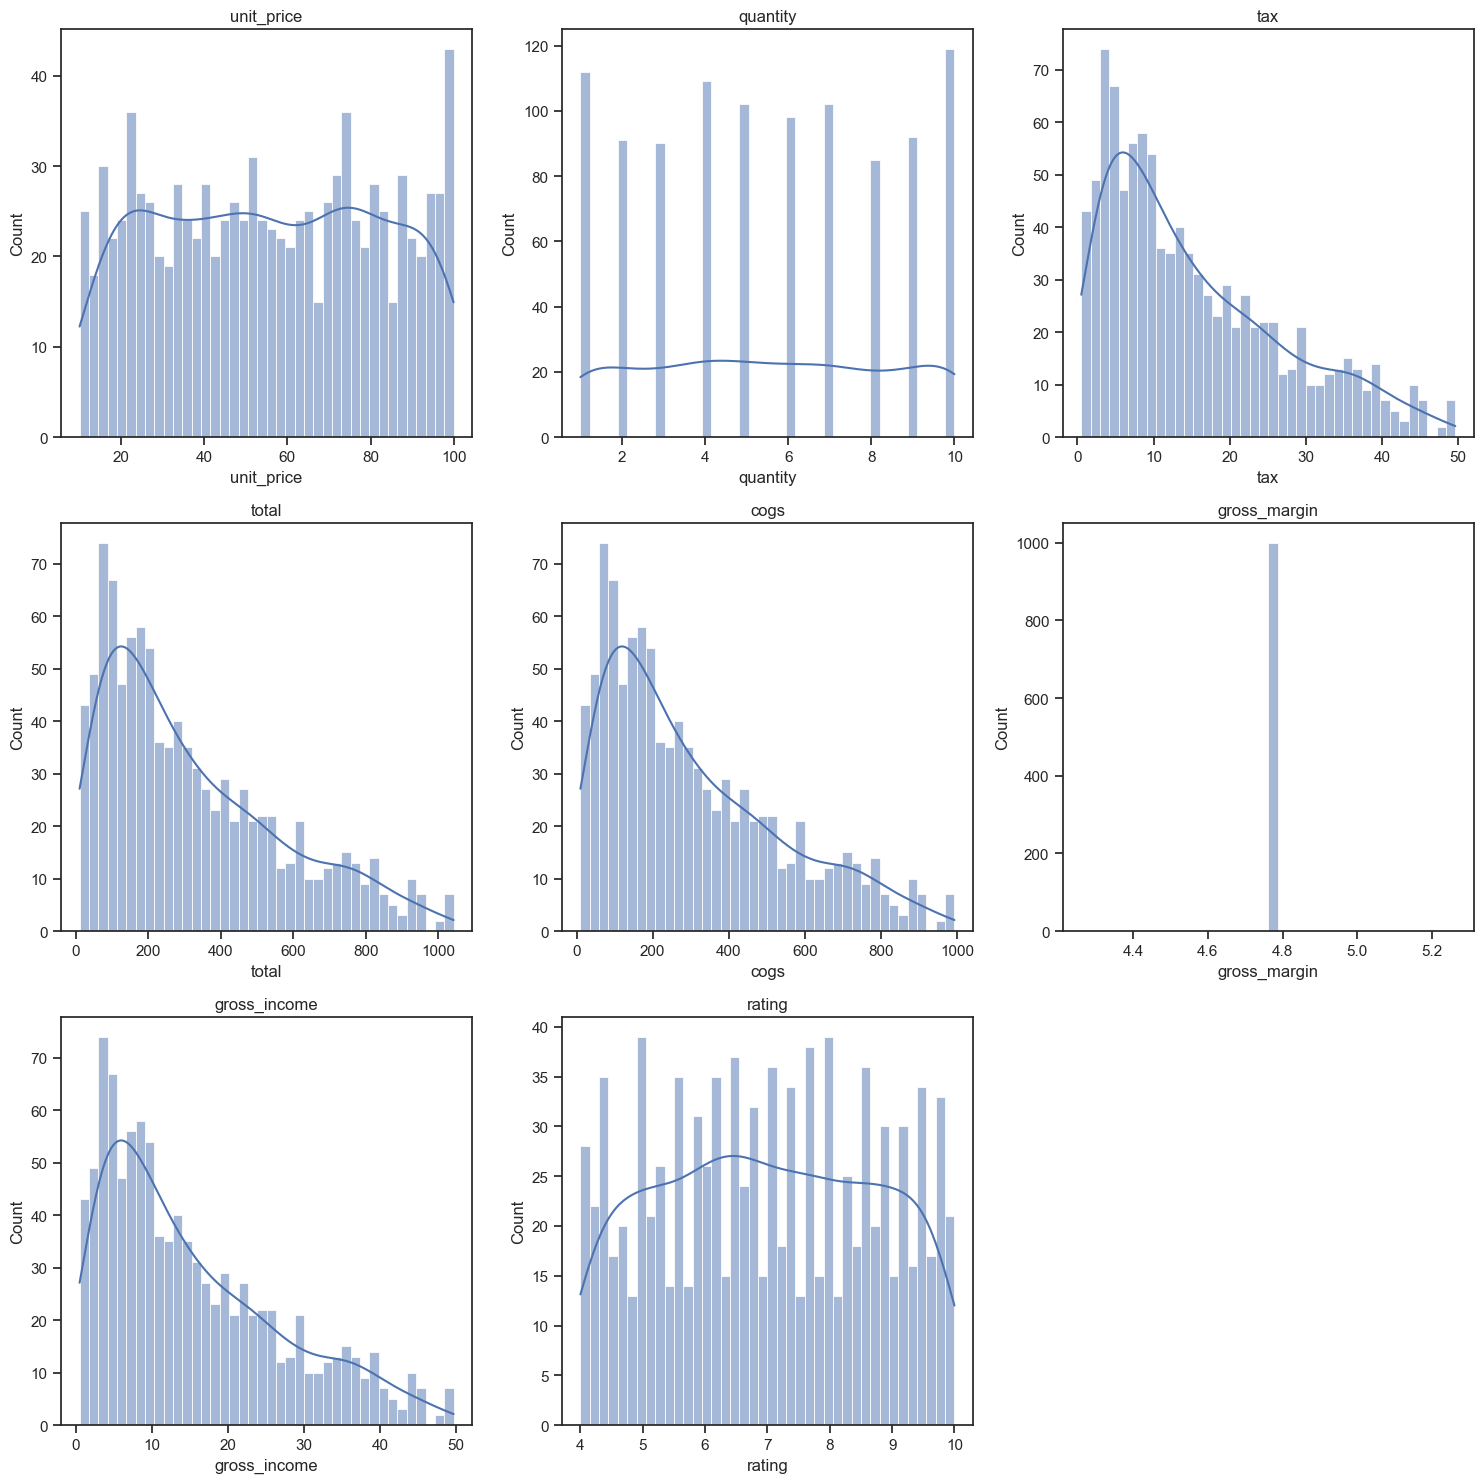

In [102]:
column = ['unit_price', 'quantity', 'tax', 'total', 'cogs', 'gross_margin', 'gross_income', 'rating']

# Menentukan jumlah subplot per baris dan per kolom berdasarkan jumlah kolom
subplot_cols = 3
subplot_rows = (len(column) // subplot_cols) + (len(column) % subplot_cols > 0)

# Membuat subplot
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(15, 5 * subplot_rows))

# Melakukan iterasi pada setiap kolom dan menampilkan histogram pada subplot yang sesuai
for i, col in enumerate(column):
    row_index = i // subplot_cols
    col_index = i % subplot_cols
    
    sns.histplot(supermarket[col], kde=True, bins=40, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

# Menghapus subplot yang tidak terpakai
for i in range(len(column), subplot_rows*subplot_cols):
    fig.delaxes(axes.flatten()[i])

# Menyusun layout dan menampilkan plot
plt.tight_layout()
plt.show()


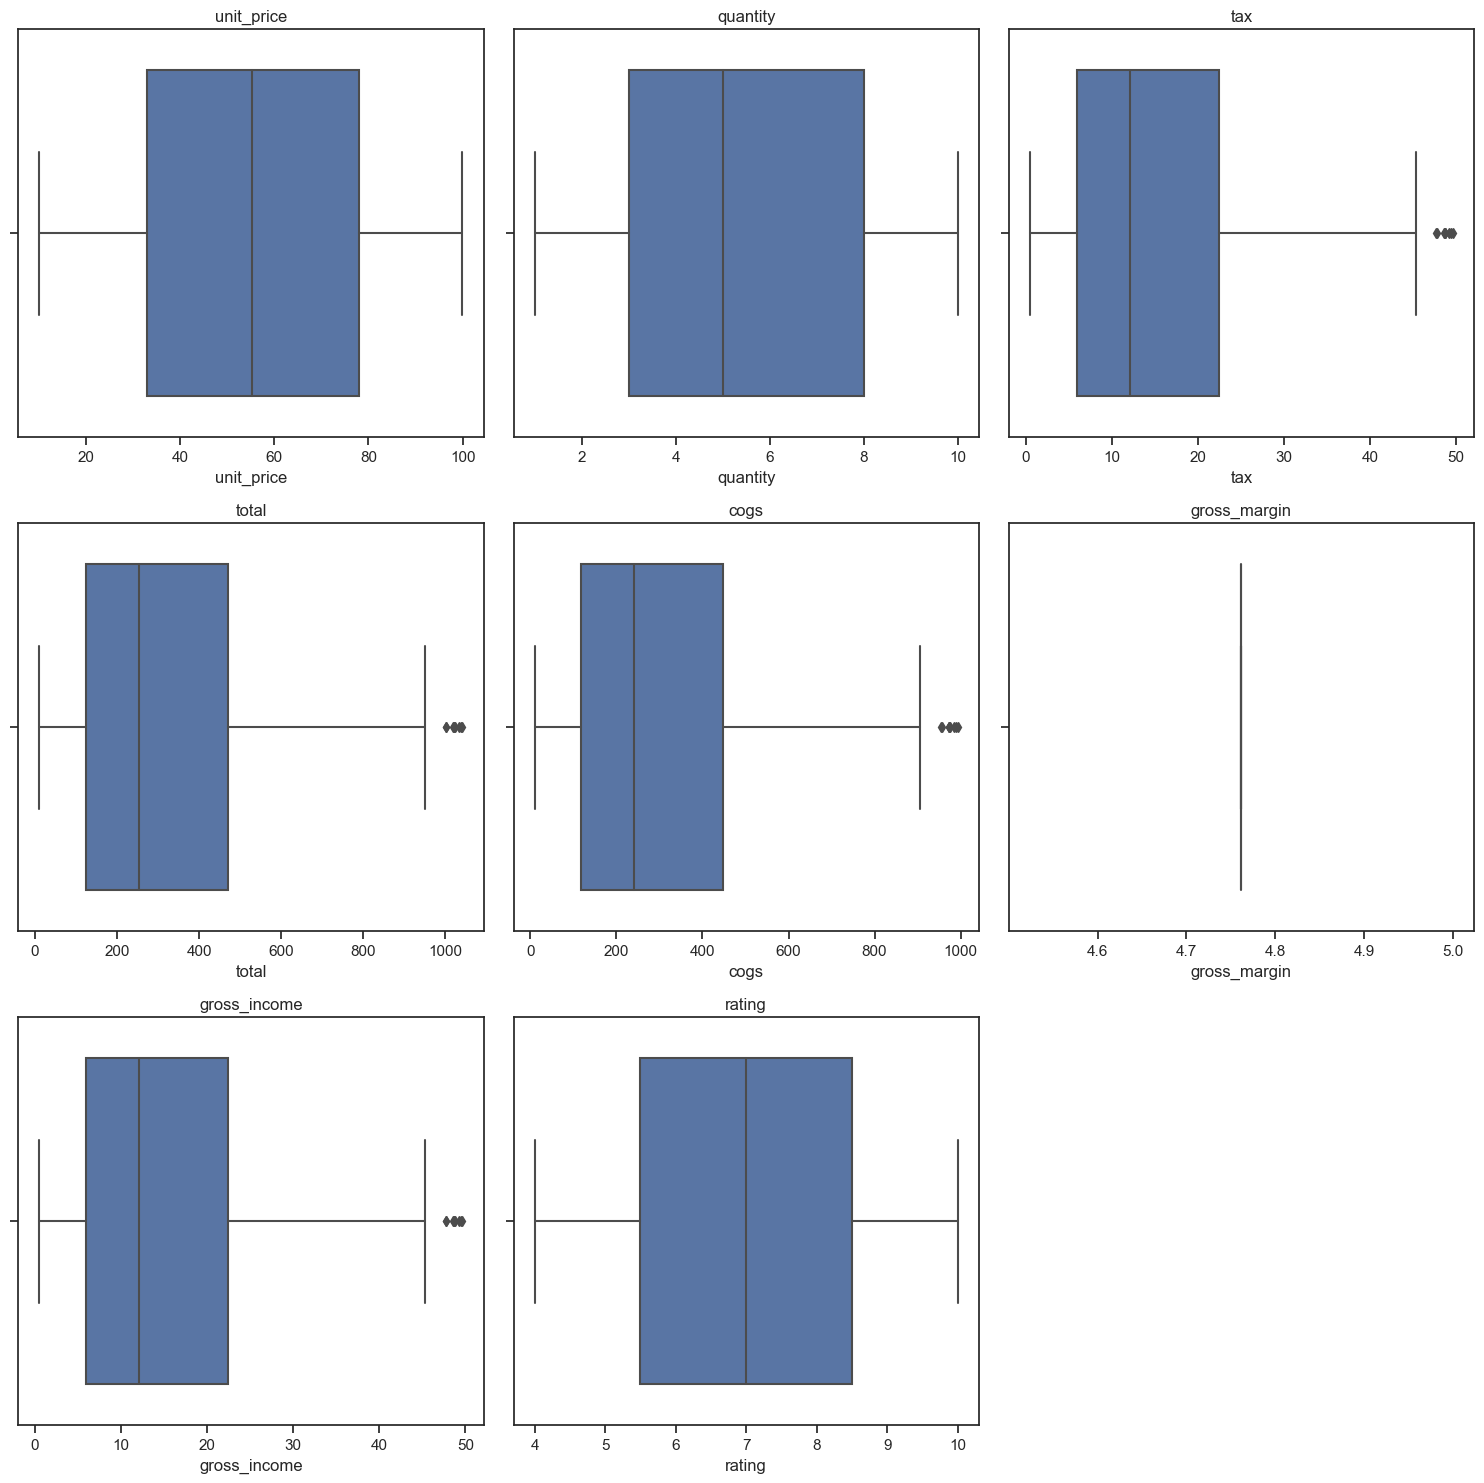

In [103]:
column = ['unit_price', 'quantity', 'tax', 'total', 'cogs', 'gross_margin', 'gross_income', 'rating']

# Menentukan jumlah subplot per baris dan per kolom berdasarkan jumlah kolom
subplot_cols = 3
subplot_rows = (len(column) // subplot_cols) + (len(column) % subplot_cols > 0)

# Membuat subplot
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(15, 5 * subplot_rows))

# Melakukan iterasi pada setiap kolom dan menampilkan boxplot pada subplot yang sesuai
for i, col in enumerate(column):
    row_index = i // subplot_cols
    col_index = i % subplot_cols
    
    sns.boxplot(x=supermarket[col], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

# Menghapus subplot yang tidak terpakai
for i in range(len(column), subplot_rows*subplot_cols):
    fig.delaxes(axes.flatten()[i])

# Menyusun layout dan menampilkan plot
plt.tight_layout()
plt.show()


In [104]:
#Handling Outlier

columns = ['unit_price', 'quantity', 'tax', 'total', 'cogs', 'gross_margin', 'gross_income', 'rating']
outlier_percentage = {}
supermarkets = supermarket.copy()

for column in columns:
    column_data = supermarkets[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'unit_price': 0
Percentage of outliers in column 'unit_price': 0.00%

Count of outliers in column 'quantity': 0
Percentage of outliers in column 'quantity': 0.00%

Count of outliers in column 'tax': 0
Percentage of outliers in column 'tax': 0.90%

Count of outliers in column 'total': 0
Percentage of outliers in column 'total': 0.90%

Count of outliers in column 'cogs': 0
Percentage of outliers in column 'cogs': 0.90%

Count of outliers in column 'gross_margin': 0
Percentage of outliers in column 'gross_margin': 0.00%

Count of outliers in column 'gross_income': 0
Percentage of outliers in column 'gross_income': 0.90%

Count of outliers in column 'rating': 0
Percentage of outliers in column 'rating': 0.00%



In [105]:
# define lower and upper bounds
columns = ['unit_price', 'quantity', 'tax', 'total', 'cogs', 'gross_margin', 'gross_income', 'rating']
lower_bounds, upper_bounds = [], []
for column in columns :
    lower_bound = supermarkets[column].describe()['25%'] - (1.5 * (supermarkets[column].describe()['75%'] -
                                                                          supermarkets[column].describe()['25%']))
    upper_bound = supermarkets[column].describe()['75%'] + (1.5 * (supermarkets[column].describe()['75%'] -
                                                                          supermarkets[column].describe()['25%']))
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

In [106]:
for n, column in enumerate(columns):
    #replaced with upper bounds and lower bounds
    #supermarkets[column] = np.where(supermarkets[column] < lower_bounds[n], lower_bounds[n], supermarkets[column])
    #supermarkets[column] = np.where(supermarkets[column] > upper_bounds[n], upper_bounds[n], supermarkets[column])
    
    #remove outlier
    supermarkets = supermarkets[(supermarkets[column] >= lower_bounds[n]) & (supermarkets[column] <= upper_bounds[n])].dropna()

In [107]:
#Handling Outlier

columns = ['unit_price', 'quantity', 'tax', 'total', 'cogs', 'gross_margin', 'gross_income', 'rating']
outlier_percentage = {}

for column in columns:
    column_data = supermarkets[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'unit_price': 0
Percentage of outliers in column 'unit_price': 0.00%

Count of outliers in column 'quantity': 0
Percentage of outliers in column 'quantity': 0.00%

Count of outliers in column 'tax': 0
Percentage of outliers in column 'tax': 0.00%

Count of outliers in column 'total': 0
Percentage of outliers in column 'total': 0.00%

Count of outliers in column 'cogs': 0
Percentage of outliers in column 'cogs': 0.00%

Count of outliers in column 'gross_margin': 0
Percentage of outliers in column 'gross_margin': 0.00%

Count of outliers in column 'gross_income': 0
Percentage of outliers in column 'gross_income': 0.00%

Count of outliers in column 'rating': 0
Percentage of outliers in column 'rating': 0.00%



In [108]:
outlier = (len(supermarket) - len(supermarkets)) / len(supermarket)

print(f"Total data sebelum proses handling outlier: {len(supermarket)}")
print(f"Total data setelah proses handling outlier: {len(supermarkets)}")
print(f"Total data yang di hapus: {outlier:.2f}%")

Total data sebelum proses handling outlier: 1000
Total data setelah proses handling outlier: 991
Total data yang di hapus: 0.01%


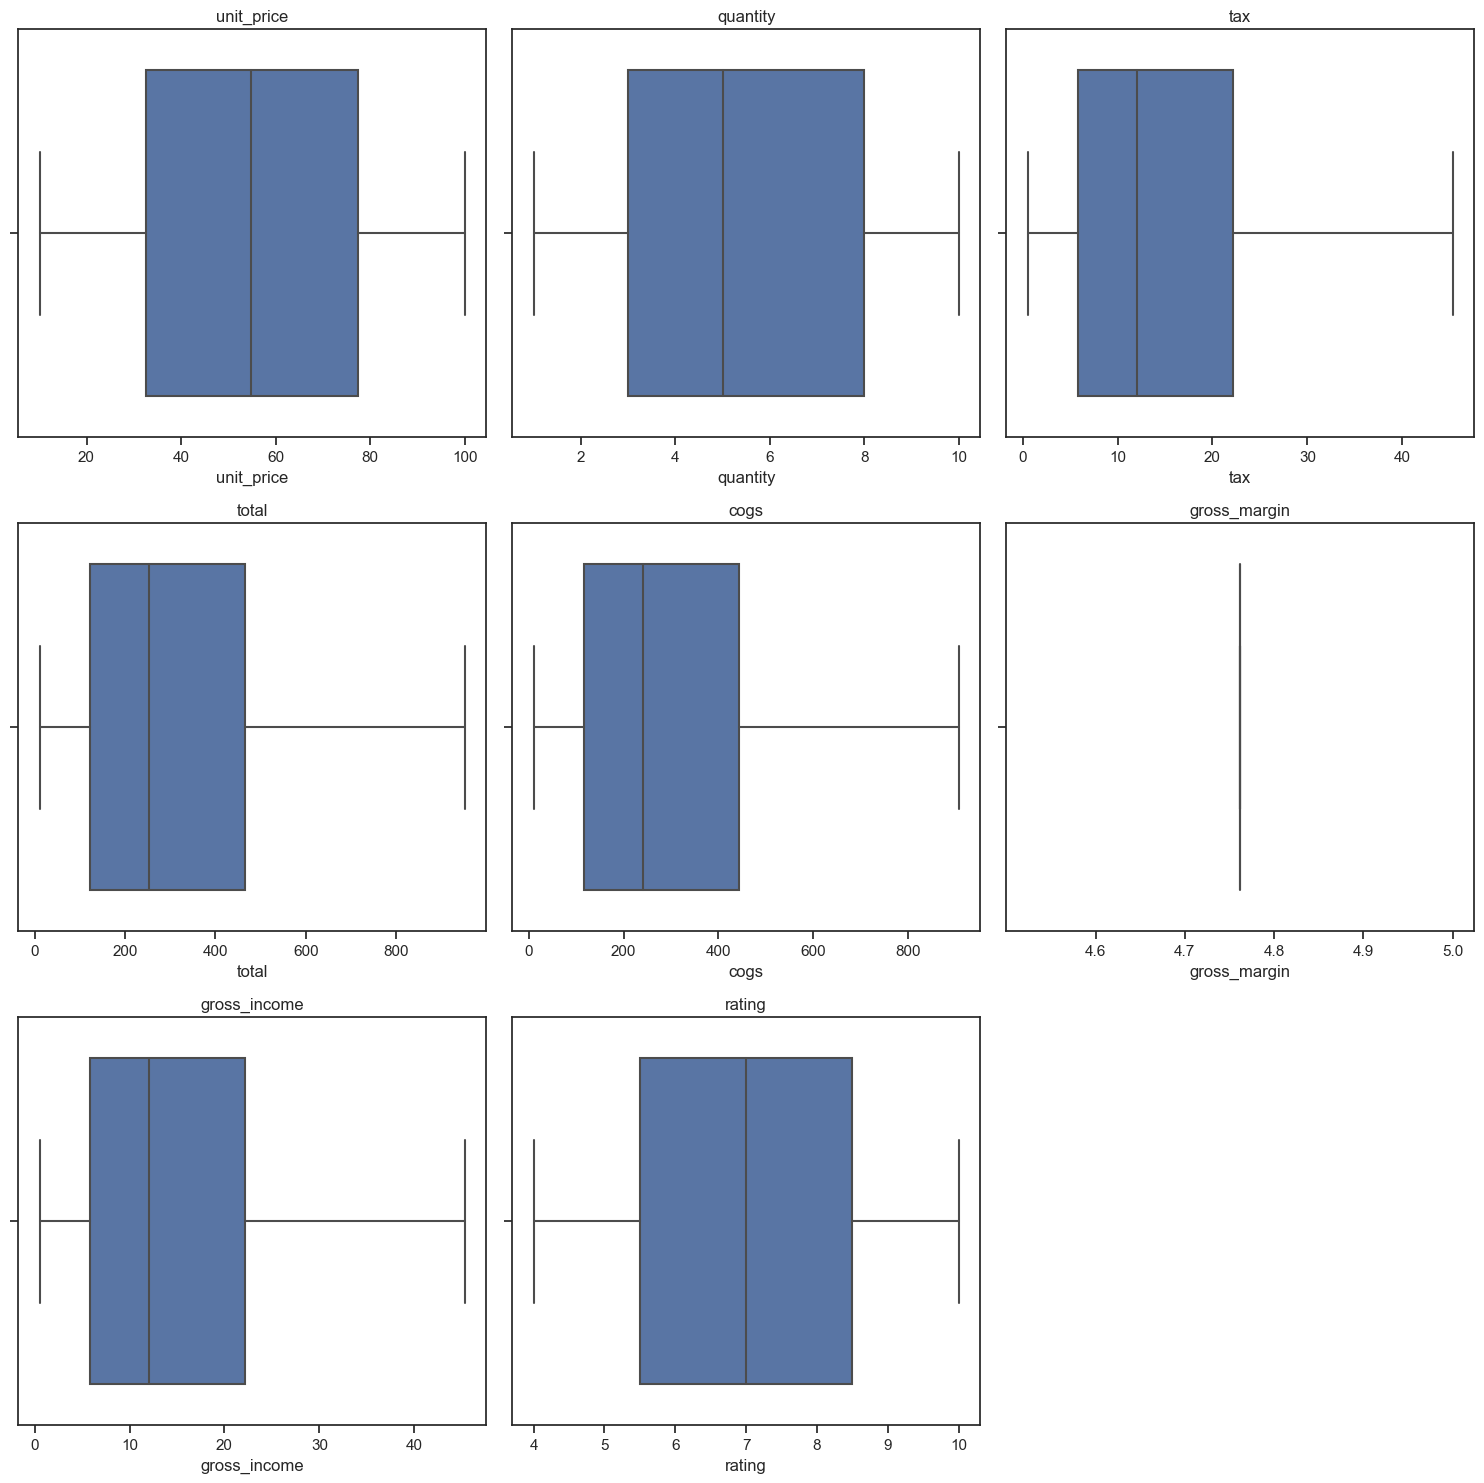

In [109]:
column = ['unit_price', 'quantity', 'tax', 'total', 'cogs', 'gross_margin', 'gross_income', 'rating']

# Menentukan jumlah subplot per baris dan per kolom berdasarkan jumlah kolom
subplot_cols = 3
subplot_rows = (len(column) // subplot_cols) + (len(column) % subplot_cols > 0)

# Membuat subplot
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(15, 5 * subplot_rows))

# Melakukan iterasi pada setiap kolom dan menampilkan boxplot pada subplot yang sesuai
for i, col in enumerate(column):
    row_index = i // subplot_cols
    col_index = i % subplot_cols
    
    sns.boxplot(x=supermarkets[col], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

# Menghapus subplot yang tidak terpakai
for i in range(len(column), subplot_rows*subplot_cols):
    fig.delaxes(axes.flatten()[i])

# Menyusun layout dan menampilkan plot
plt.tight_layout()
plt.show()

### Univariate Analysis - Categorical Variable

In [110]:
# Numerical datatypes
supermarkets.select_dtypes(exclude=['int64','float64','Int64']).dtypes

invoice_id                object
branch                  category
city                      object
customer_type             object
gender                    object
product_line              object
date              datetime64[ns]
time             timedelta64[ns]
payment                   object
dtype: object

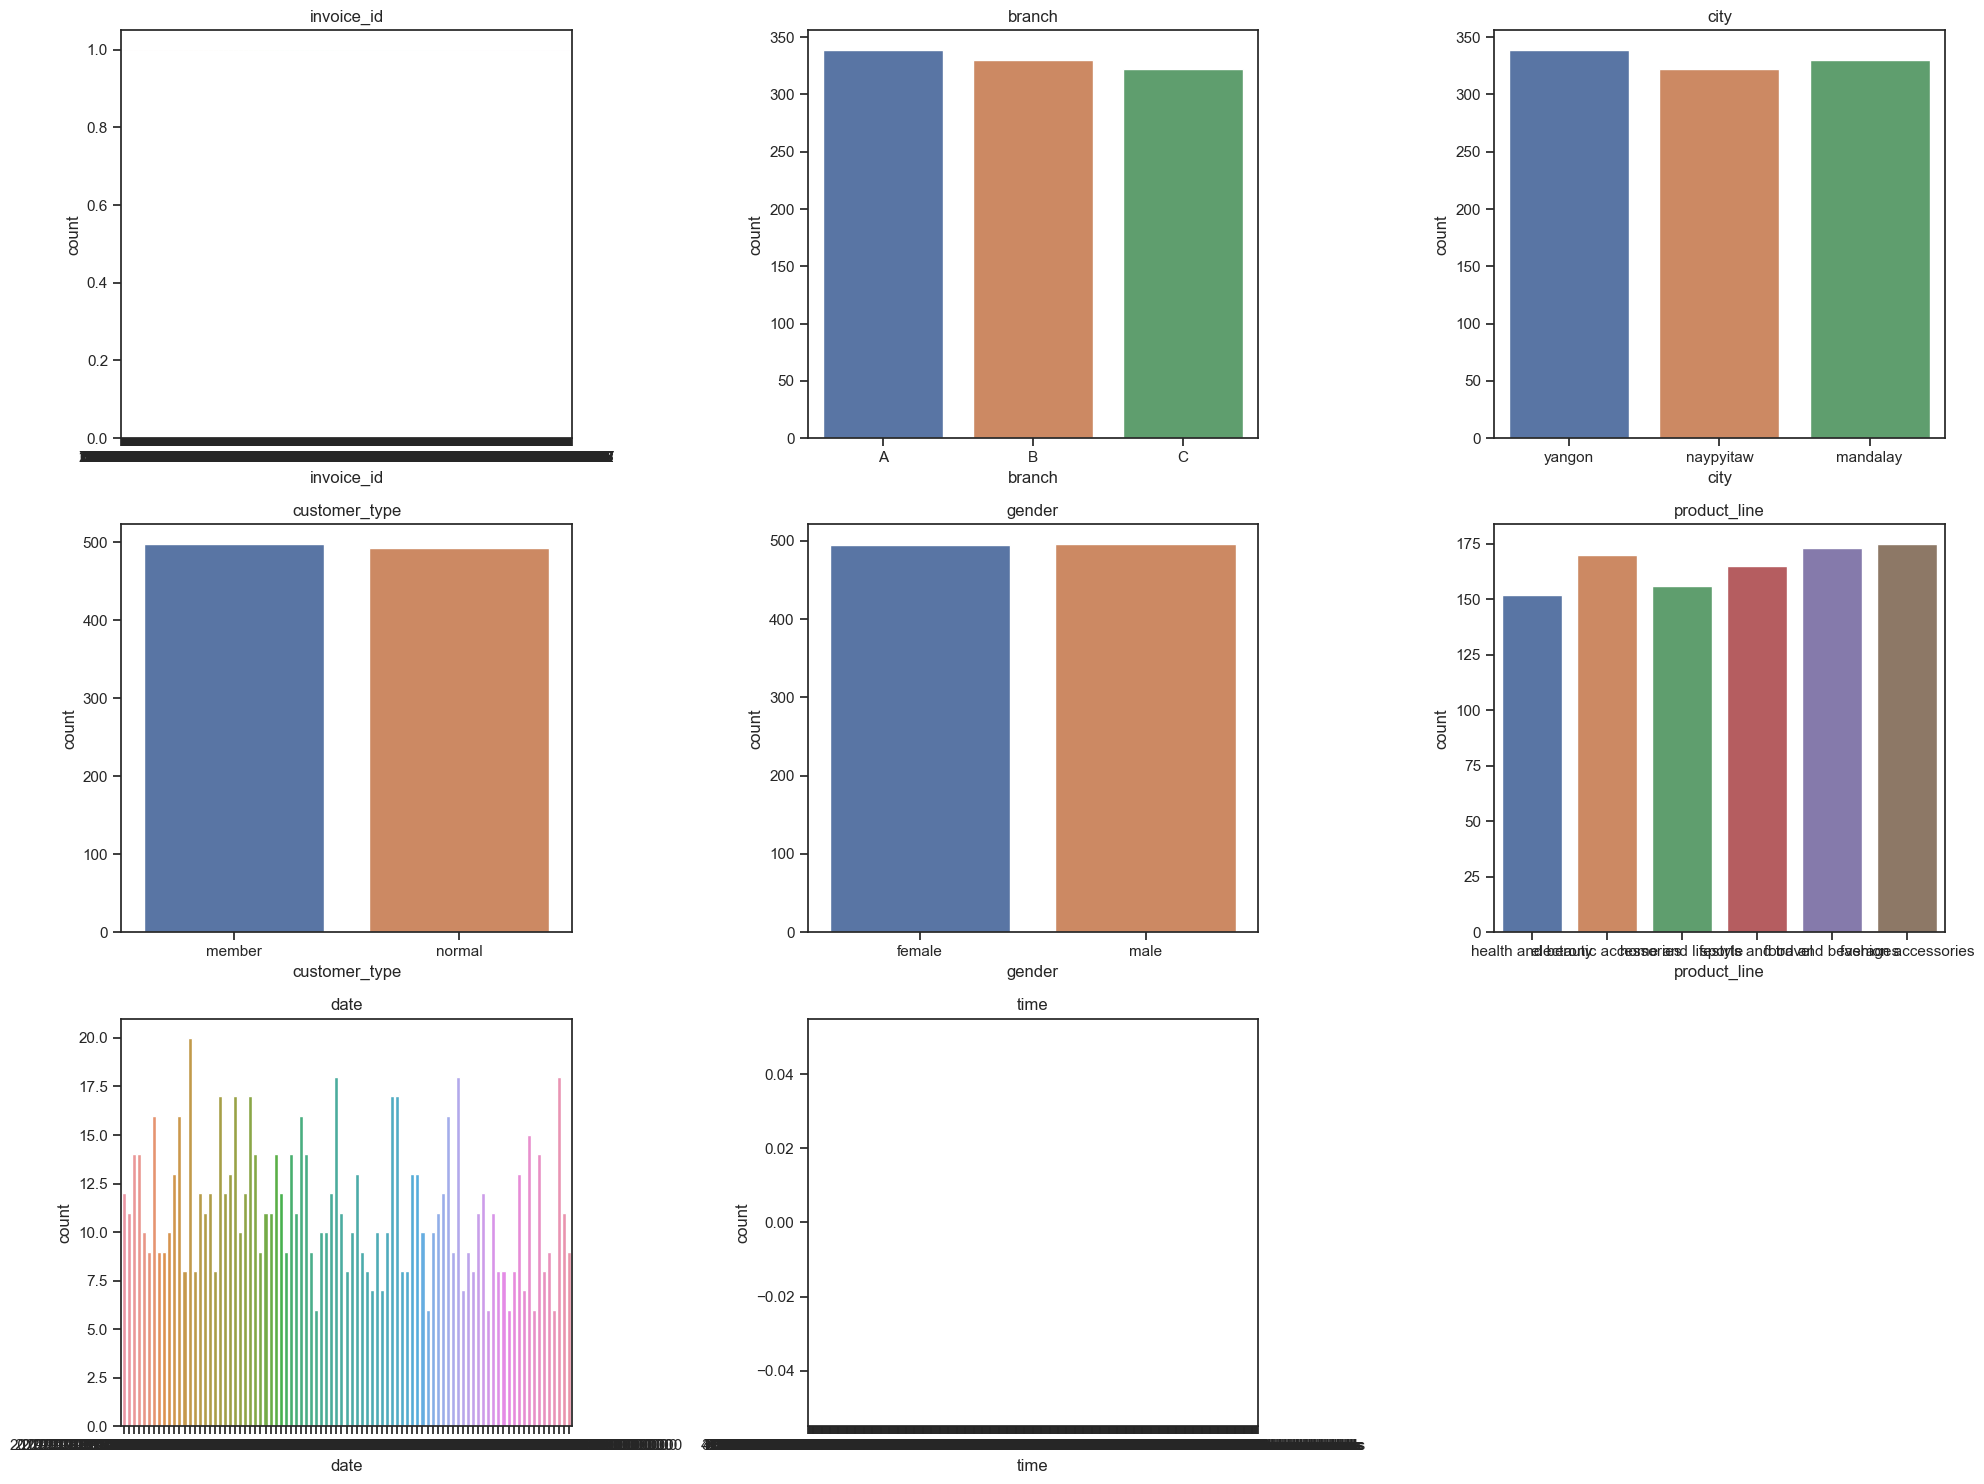

In [111]:
column = ['invoice_id','branch', 'city', 'customer_type', 'gender', 'product_line', 'date', 'time']
#column = ['branch', 'city', 'customer_type', 'gender', 'product_line']

# Menentukan jumlah subplot per baris dan per kolom berdasarkan jumlah kolom
subplot_cols = 3
subplot_rows = (len(column) // subplot_cols) + (len(column) % subplot_cols > 0)

# Membuat subplot
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(20, 5 * subplot_rows))

# Melakukan iterasi pada setiap kolom dan menampilkan barplot pada subplot yang sesuai
for i, col in enumerate(column):
    row_index = i // subplot_cols
    col_index = i % subplot_cols
    
    sns.countplot(x=supermarkets[col], data=supermarkets, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

# Menghapus subplot yang tidak terpakai
for i in range(len(column), subplot_rows*subplot_cols):
    fig.delaxes(axes.flatten()[i])

# Menyusun layout dan menampilkan plot
plt.tight_layout()
plt.show()

### Bivariate Analysis

In [112]:
supermarkets.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
0,750-67-8428,A,yangon,member,female,health and beauty,74.69,7,26.1415,548.9715,2019-01-05,0 days 13:08:00,ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,naypyitaw,normal,female,electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,0 days 10:29:00,cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,yangon,normal,male,home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,0 days 13:23:00,credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,yangon,member,male,health and beauty,58.22,8,23.2880,489.0480,2019-01-27,0 days 20:33:00,ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,yangon,normal,male,sports and travel,86.31,7,30.2085,634.3785,2019-02-08,0 days 10:37:00,ewallet,604.17,4.761905,30.2085,5.3


### Transaction by product

             product_line  invoice_id
1     fashion accessories         175
2      food and beverages         173
0  electronic accessories         170
5       sports and travel         165
4      home and lifestyle         156
3       health and beauty         152


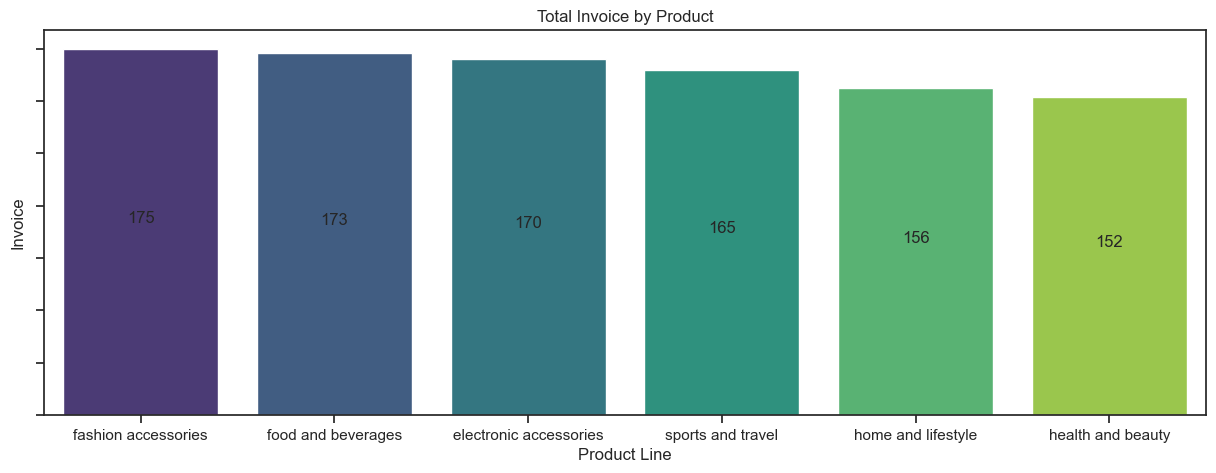

In [149]:
# Hitung total penjualan berdasarkan product_line
invoice_by_product_line = supermarkets.groupby('product_line')['invoice_id'].count().reset_index()

# Urutkan tabel dari yang terbesar ke terkecil
invoice_by_product_line = invoice_by_product_line.sort_values('invoice_id', ascending=False)

# Tampilkan tabel
print(invoice_by_product_line)


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='invoice_id', data=invoice_by_product_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace(',', '.'), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('Invoice')
plt.title('Total Invoice by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Unit Price by product

             product_line  unit_price
5       sports and travel   56.760242
1     fashion accessories   56.444914
2      food and beverages   55.763121
3       health and beauty   54.854474
4      home and lifestyle   54.249231
0  electronic accessories   53.551588


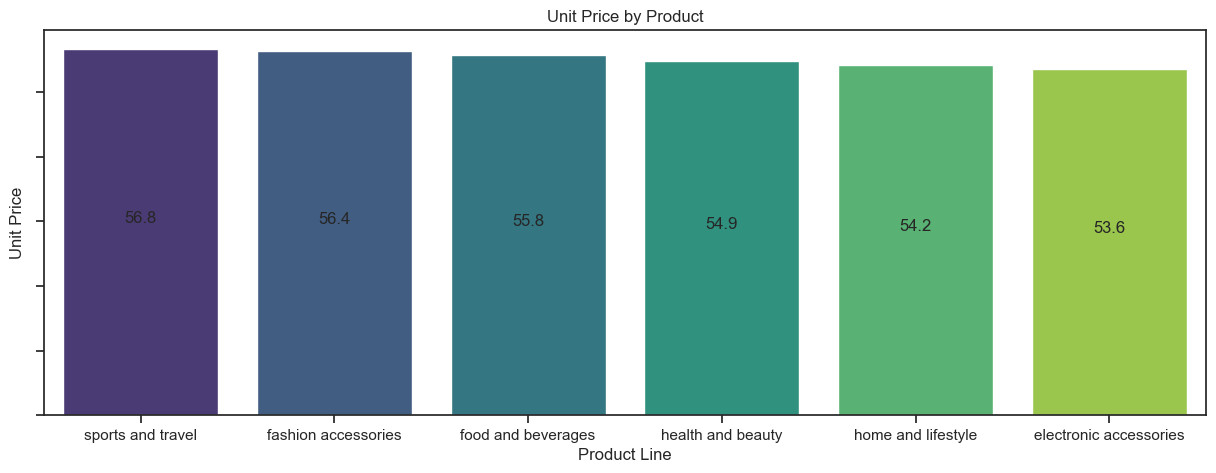

In [150]:
# Hitung total penjualan berdasarkan product_line
price_by_product_line = supermarkets.groupby('product_line')['unit_price'].mean().reset_index()

# Urutkan tabel dari yang terbesar ke terkecil
price_by_product_line = price_by_product_line.sort_values('unit_price', ascending=False)

# Tampilkan tabel
print(price_by_product_line)


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='unit_price', data=price_by_product_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}'.replace(',', '.'), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('Unit Price')
plt.title('Unit Price by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Total Sales by Product

             product_line       total
2      food and beverages  55110.3840
0  electronic accessories  54337.5315
5       sports and travel  54120.7065
1     fashion accessories  51203.2500
4      home and lifestyle  49789.6980
3       health and beauty  49193.7390


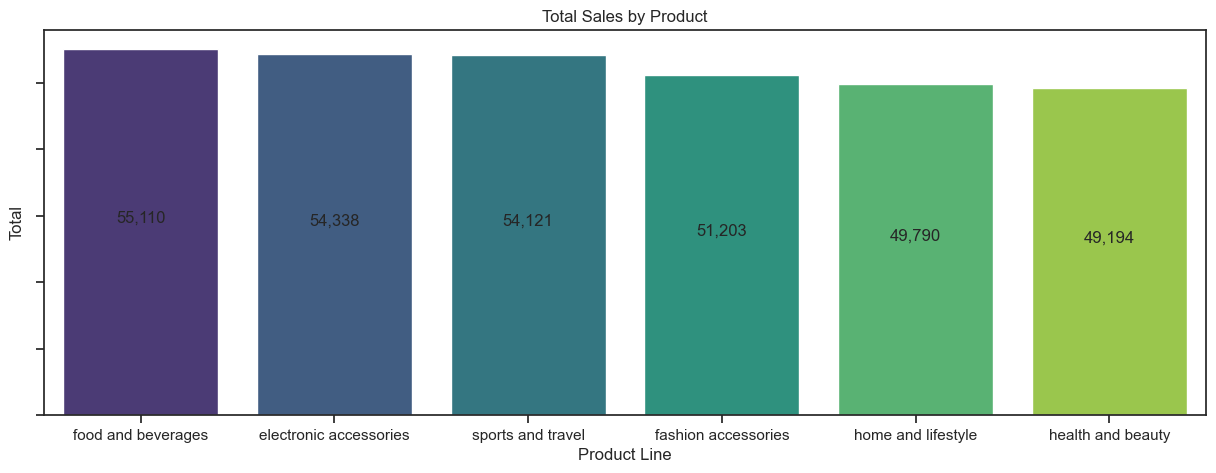

In [151]:
# Hitung total penjualan berdasarkan product_line
total_sales_by_product_line = supermarkets.groupby('product_line')['total'].sum().reset_index()

# Urutkan tabel dari yang terbesar ke terkecil
total_sales_by_product_line = total_sales_by_product_line.sort_values('total', ascending=False)

# Tampilkan tabel
print(total_sales_by_product_line)


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='total', data=total_sales_by_product_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace('.', ','), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('Total')
plt.title('Total Sales by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Quantity by Product

             product_line  quantity
0  electronic accessories       971
2      food and beverages       942
5       sports and travel       910
1     fashion accessories       872
4      home and lifestyle       871
3       health and beauty       854


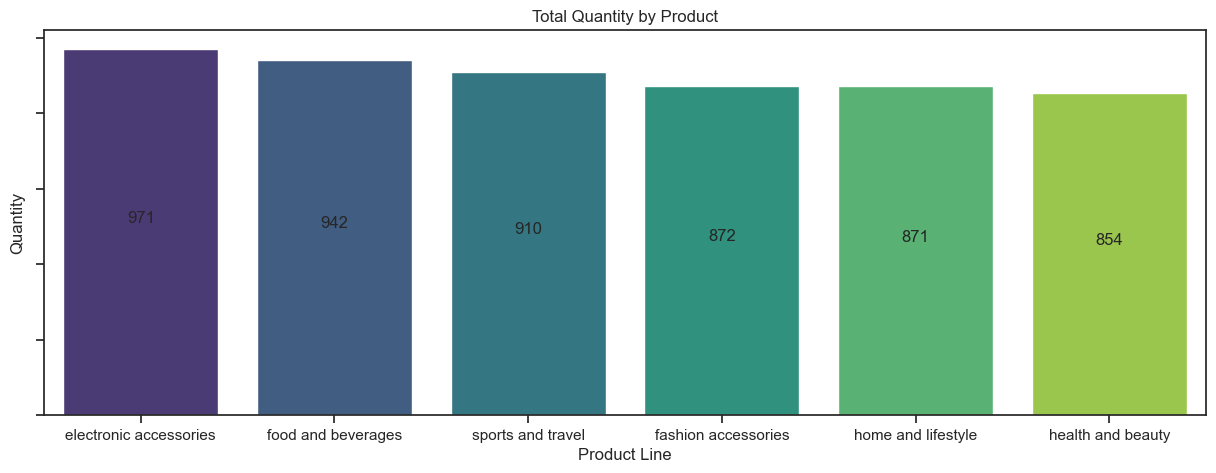

In [152]:
# Hitung total penjualan berdasarkan product_line
total_quantity_by_product_line = supermarkets.groupby('product_line')['quantity'].sum().reset_index()

# Urutkan tabel dari yang terbesar ke terkecil
total_quantity_by_product_line = total_quantity_by_product_line.sort_values('quantity', ascending=False)

# Tampilkan tabel
print(total_quantity_by_product_line)


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='quantity', data=total_quantity_by_product_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace(',', '.'), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('Quantity')
plt.title('Total Quantity by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Total Sales per Quantity by Product

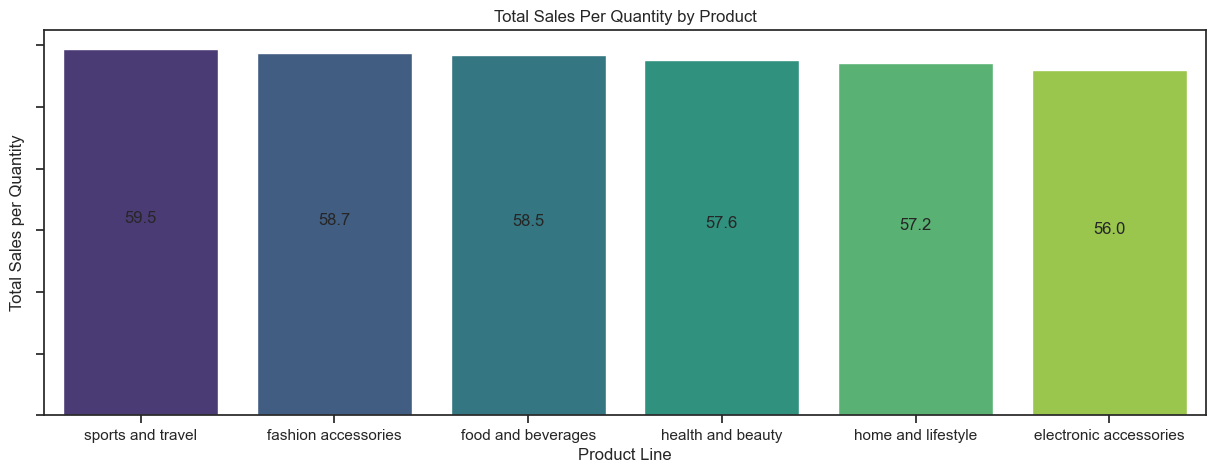

In [153]:
#Menghitung total sales by product line
total_sales_by_line = supermarkets.groupby('product_line').agg({'total': 'sum', 'quantity': 'sum'}).reset_index()

# Menambahkan kolom baru untuk rasio total_sales dibagi total_quantity
total_sales_by_line['sales_quantity_ratio'] = total_sales_by_line['total'] / total_sales_by_line['quantity']

# Urutkan tabel dari yang terbesar ke terkecil
total_sales_by_line = total_sales_by_line.sort_values('sales_quantity_ratio', ascending=False)

total_sales_by_line


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='sales_quantity_ratio', data=total_sales_by_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}'.replace(',', '.'), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('Total Sales per Quantity')
plt.title('Total Sales Per Quantity by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Gross Income by Product

             product_line  gross_income
2      food and beverages     2624.3040
0  electronic accessories     2587.5015
5       sports and travel     2577.1765
1     fashion accessories     2438.2500
4      home and lifestyle     2370.9380
3       health and beauty     2342.5590


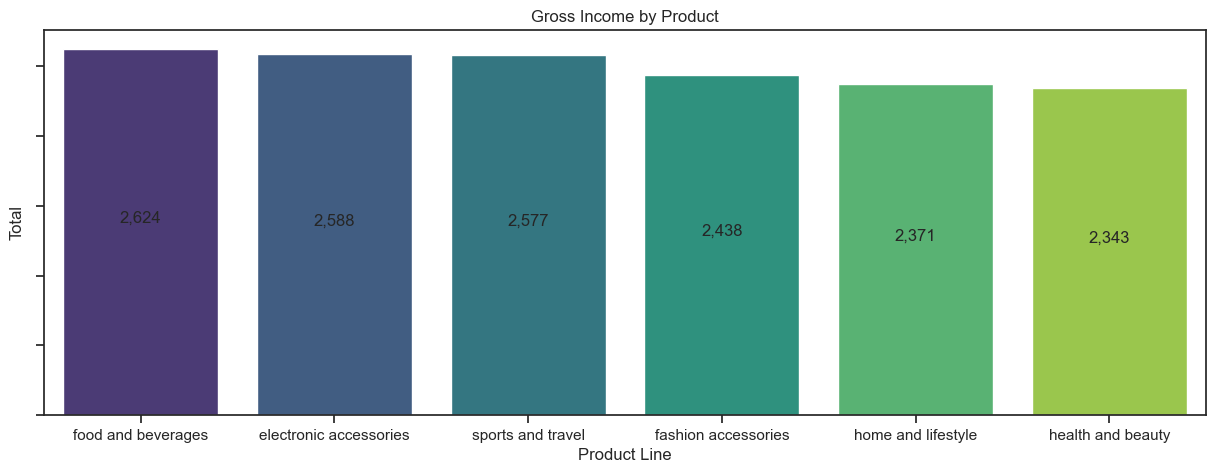

In [154]:
# Hitung total penjualan berdasarkan product_line
gross_income_by_product_line = supermarkets.groupby('product_line')['gross_income'].sum().reset_index()

# Urutkan tabel dari yang terbesar ke terkecil
gross_income_by_product_line = gross_income_by_product_line.sort_values('gross_income', ascending=False)

# Tampilkan tabel
print(gross_income_by_product_line)



plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='gross_income', data=gross_income_by_product_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace('.', ','), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('Total')
plt.title('Gross Income by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Gross Income per Quantity by Product

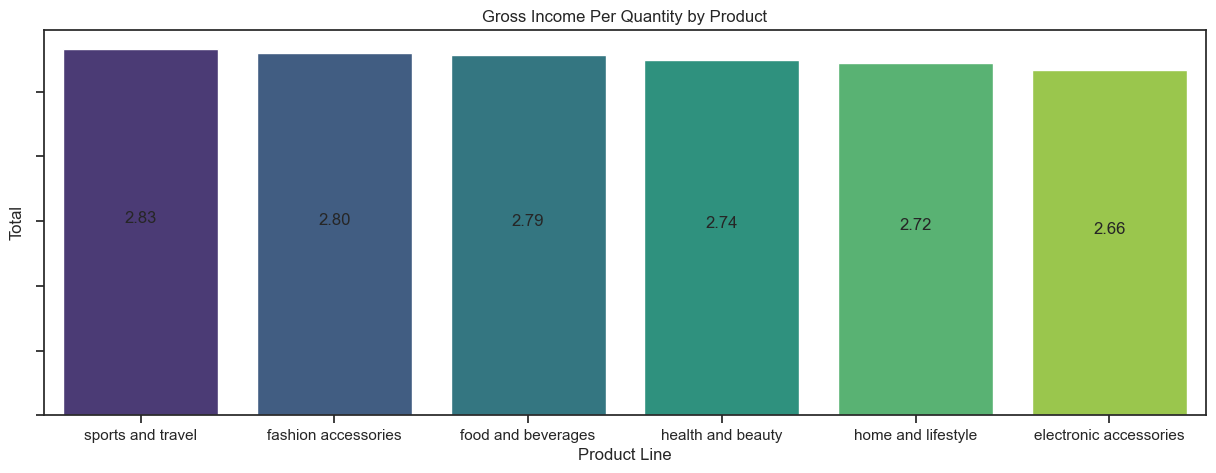

In [155]:
#Menghitung total sales by product line
gross_income_by_line = supermarkets.groupby('product_line').agg({'gross_income': 'sum', 'quantity': 'sum'}).reset_index()

# Menambahkan kolom baru untuk rasio total_sales dibagi total_quantity
gross_income_by_line['gross_quantity_ratio'] = gross_income_by_line['gross_income'] / gross_income_by_line['quantity']

# Urutkan tabel dari yang terbesar ke terkecil
gross_income_by_line = gross_income_by_line.sort_values('gross_quantity_ratio', ascending=False)

gross_income_by_line


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='gross_quantity_ratio', data=gross_income_by_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}'.replace(',', '.'), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('Total')
plt.title('Gross Income Per Quantity by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### COGS by Product

             product_line      cogs
2      food and beverages  52486.08
0  electronic accessories  51750.03
5       sports and travel  51543.53
1     fashion accessories  48765.00
4      home and lifestyle  47418.76
3       health and beauty  46851.18


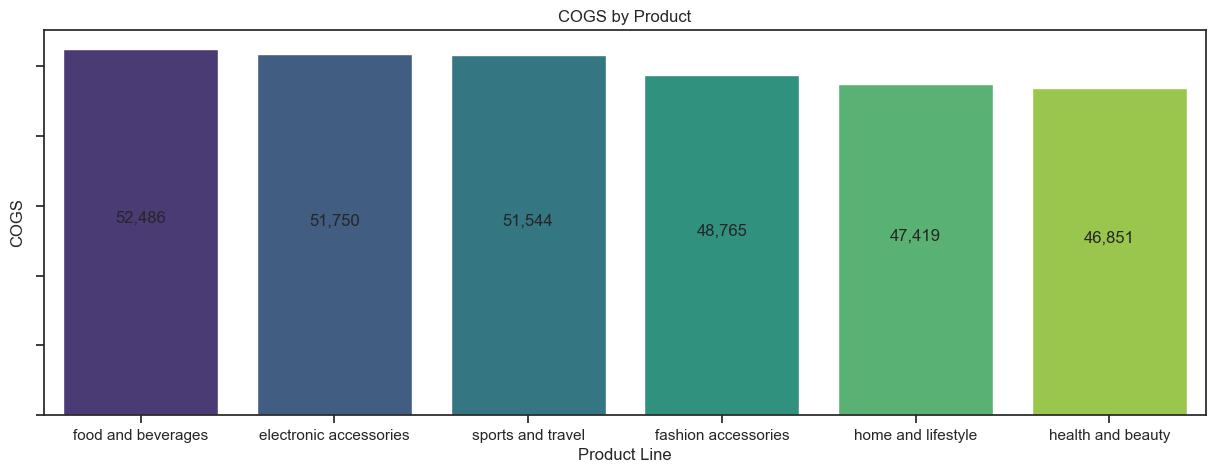

In [156]:
# Hitung total penjualan berdasarkan product_line
cogs_by_product_line = supermarkets.groupby('product_line')['cogs'].sum().reset_index()

# Urutkan tabel dari yang terbesar ke terkecil
cogs_by_product_line = cogs_by_product_line.sort_values('cogs', ascending=False)

# Tampilkan tabel
print(cogs_by_product_line)


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='cogs', data=cogs_by_product_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace('.', ','), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('COGS')
plt.title('COGS by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### COGS per Quantity by Product

             product_line      cogs  quantity  cogs_quantity_ratio
5       sports and travel  51543.53       910            56.641242
1     fashion accessories  48765.00       872            55.923165
2      food and beverages  52486.08       942            55.717707
3       health and beauty  46851.18       854            54.860867
4      home and lifestyle  47418.76       871            54.441745
0  electronic accessories  51750.03       971            53.295602


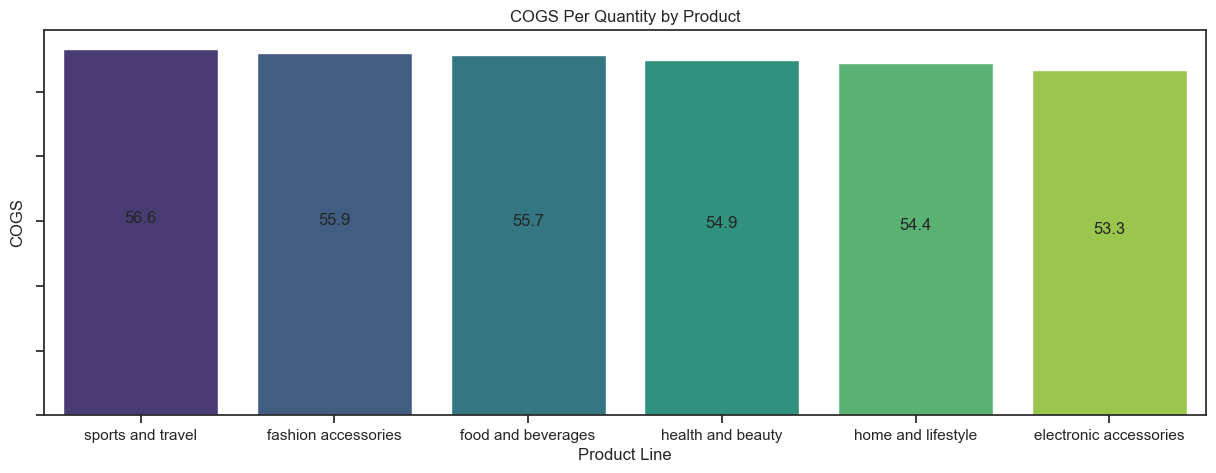

In [157]:
#Menghitung total sales by product line
cogs_by_line = supermarkets.groupby('product_line').agg({'cogs': 'sum', 'quantity': 'sum'}).reset_index()

# Menambahkan kolom baru untuk rasio total_sales dibagi total_quantity
cogs_by_line['cogs_quantity_ratio'] = cogs_by_line['cogs'] / cogs_by_line['quantity']

# Urutkan tabel dari yang terbesar ke terkecil
cogs_by_line = cogs_by_line.sort_values('cogs_quantity_ratio', ascending=False)

print(cogs_by_line)


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='product_line', y='cogs_quantity_ratio', data=cogs_by_line, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}'.replace(',', '.'), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Product Line')
plt.ylabel('COGS')
plt.title('COGS Per Quantity by Product')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Total Sales by City

        city        total
2     yangon  105161.0805
1  naypyitaw  104441.4315
0   mandalay  104152.7970


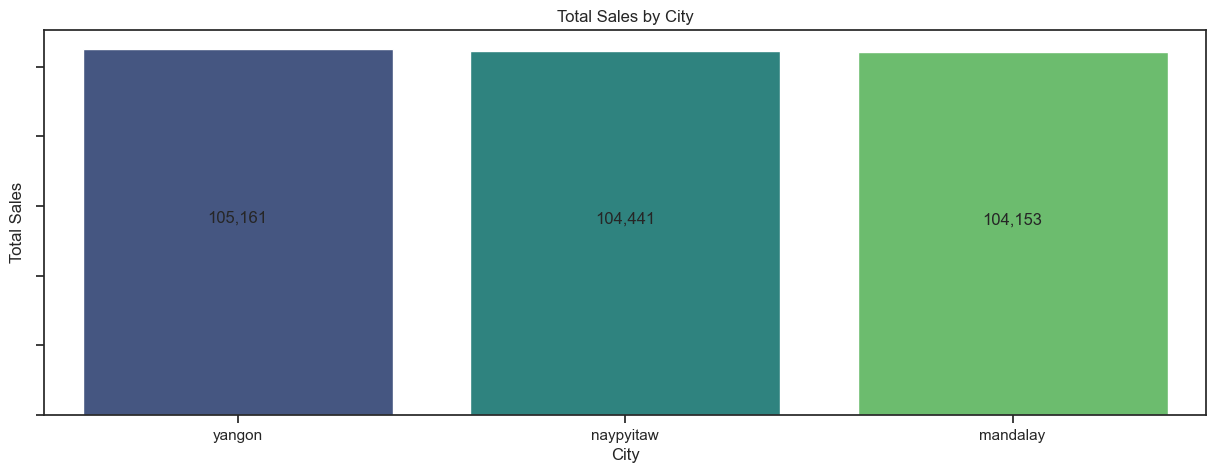

In [160]:
#Menghitung total sales by product line
sales_by_city = supermarkets.groupby('city').agg({'total': 'sum'}).reset_index()

# Urutkan tabel dari yang terbesar ke terkecil
sales_by_city = sales_by_city.sort_values('total', ascending=False)

print(sales_by_city)


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='city', y='total', data=sales_by_city, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace('.', ','), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Total Sales by Customer Type

  customer_type       total
0        member  161125.629
1        normal  152629.680


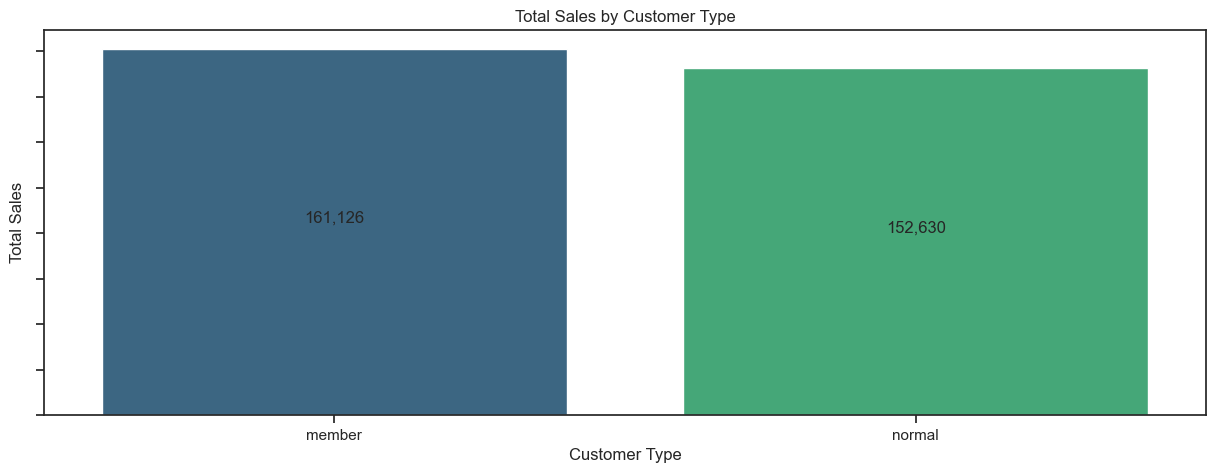

In [164]:
#Menghitung total sales by product line
sales_by_type = supermarkets.groupby('customer_type').agg({'total': 'sum'}).reset_index()

# Urutkan tabel dari yang terbesar ke terkecil
sales_by_type = sales_by_type.sort_values('total', ascending=False)

print(sales_by_type)


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='customer_type', y='total', data=sales_by_type, palette='viridis')

# Menambahkan angka total di atas batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace('.', ','), (p.get_x() + p.get_width() / 2., p.get_height() /2.), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Type')

# Menyembunyikan angka pada sumbu y (ylabel)
ax.set_yticklabels([])

plt.show()

### Multivariate Analysis

In [161]:
supermarkets.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
0,750-67-8428,A,yangon,member,female,health and beauty,74.69,7,26.1415,548.9715,2019-01-05,0 days 13:08:00,ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,naypyitaw,normal,female,electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,0 days 10:29:00,cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,yangon,normal,male,home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,0 days 13:23:00,credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,yangon,member,male,health and beauty,58.22,8,23.2880,489.0480,2019-01-27,0 days 20:33:00,ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,yangon,normal,male,sports and travel,86.31,7,30.2085,634.3785,2019-02-08,0 days 10:37:00,ewallet,604.17,4.761905,30.2085,5.3


### Total Sales by City and Product Line

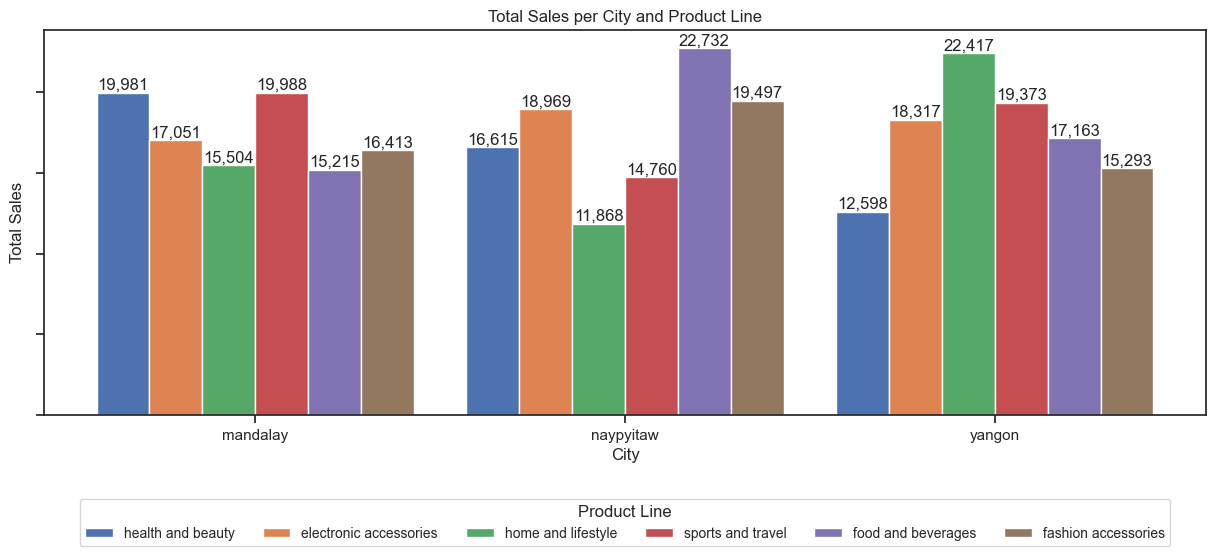

In [142]:
# Menghitung total penjualan per kota dan garis produk
total_sales_per_city_product = supermarkets.groupby(['city', 'product_line'])['total'].sum().unstack().reset_index()

# Membuat grup barplot
bar_width = 0.2
group_width = bar_width * len(supermarkets['product_line'].unique())
index = np.arange(len(total_sales_per_city_product['city'])) * (group_width + 0.2)

# Pengaturan ukuran figsize
fig, ax = plt.subplots(figsize=(15, 5))

for i, product_line in enumerate(supermarkets['product_line'].unique()):
    bars = ax.bar(index + i * bar_width, total_sales_per_city_product[product_line], bar_width, label=product_line)
    
    # Menambahkan nilai di atas setiap bar dengan format
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, '{:,.0f}'.format(yval), ha='center', va='bottom')

# Pengaturan sumbu dan label
ax.set_xlabel('City')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales per City and Product Line')
ax.set_xticks(index + (group_width - bar_width) / 2)
ax.set_xticklabels(total_sales_per_city_product['city'])

# Menempatkan legend di bawah grafik dengan orientasi horizontal
ax.legend(title='Product Line', bbox_to_anchor=(0.5, -0.2), loc='upper center', fontsize='small', ncol=len(supermarkets['product_line'].unique()))

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: ''))

# Menampilkan plot
plt.show()


### Total Sales by Product Line and Customer Type

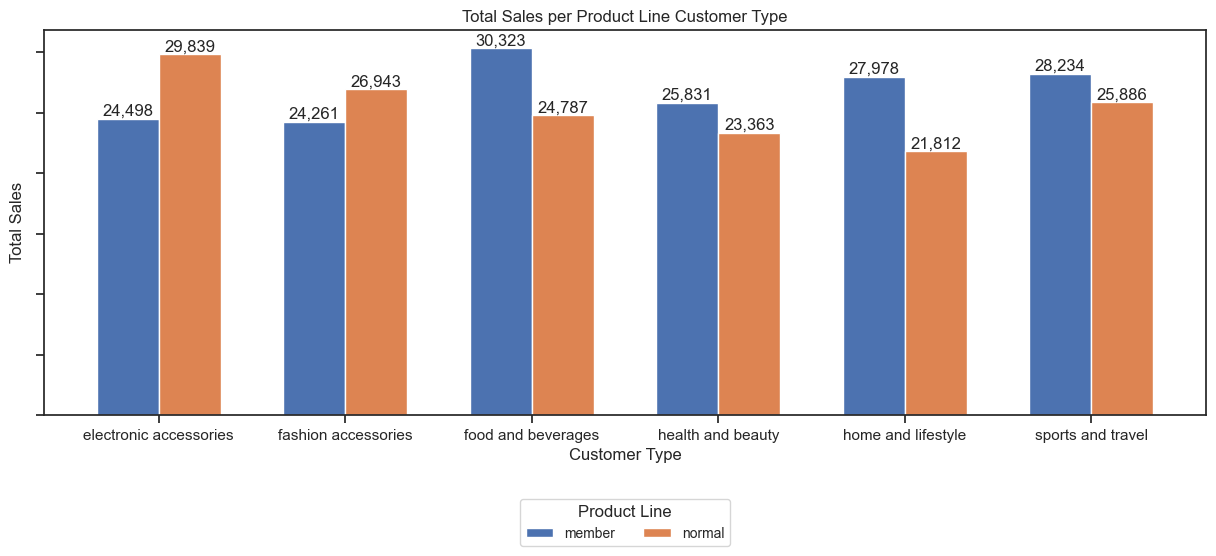

In [167]:
# Menghitung total penjualan per kota dan garis produk
total_sales_per_type_product = supermarkets.groupby(['product_line', 'customer_type'])['total'].sum().unstack().reset_index()

# Membuat grup barplot
bar_width = 0.2
group_width = bar_width * len(supermarkets['customer_type'].unique())
index = np.arange(len(total_sales_per_type_product['product_line'])) * (group_width + 0.2)

# Pengaturan ukuran figsize
fig, ax = plt.subplots(figsize=(15, 5))

for i, customer_type in enumerate(supermarkets['customer_type'].unique()):
    bars = ax.bar(index + i * bar_width, total_sales_per_type_product[customer_type], bar_width, label=customer_type)
    
    # Menambahkan nilai di atas setiap bar dengan format
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, '{:,.0f}'.format(yval), ha='center', va='bottom')

# Pengaturan sumbu dan label
ax.set_xlabel('Customer Type')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales per Product Line Customer Type')
ax.set_xticks(index + (group_width - bar_width) / 2)
ax.set_xticklabels(total_sales_per_type_product['product_line'])

# Menempatkan legend di bawah grafik dengan orientasi horizontal
ax.legend(title='Product Line', bbox_to_anchor=(0.5, -0.2), loc='upper center', fontsize='small', ncol=len(supermarkets['customer_type'].unique()))

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: ''))

# Menampilkan plot
plt.show()


### Total Sales by Product Line and Gender

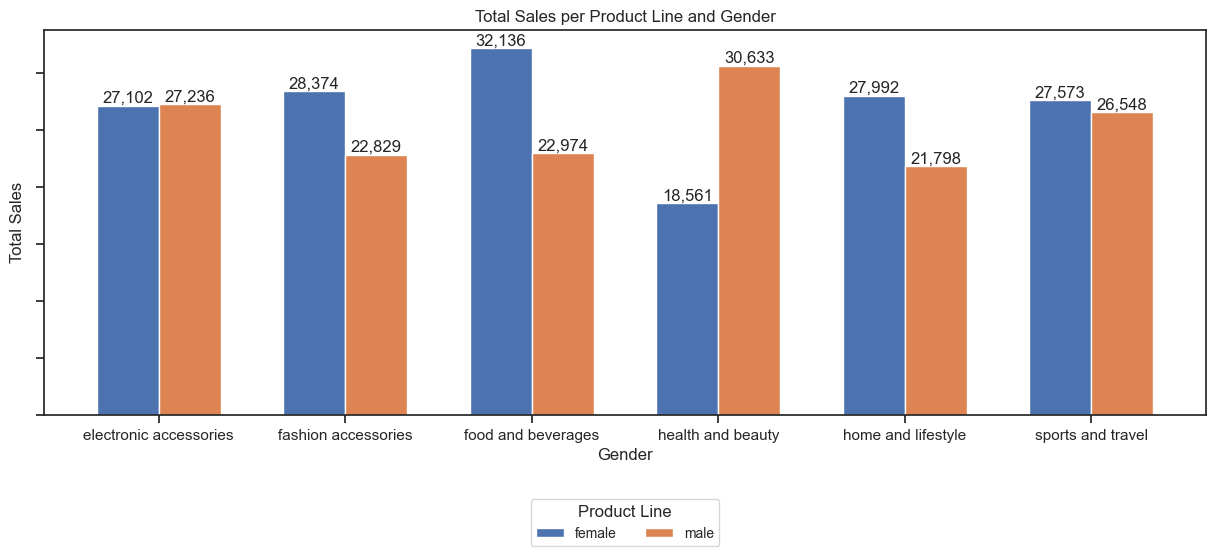

In [168]:
# Menghitung total penjualan per kota dan garis produk
total_sales_per_gender_product = supermarkets.groupby(['product_line', 'gender'])['total'].sum().unstack().reset_index()

# Membuat grup barplot
bar_width = 0.2
group_width = bar_width * len(supermarkets['gender'].unique())
index = np.arange(len(total_sales_per_gender_product['product_line'])) * (group_width + 0.2)

# Pengaturan ukuran figsize
fig, ax = plt.subplots(figsize=(15, 5))

for i, gender in enumerate(supermarkets['gender'].unique()):
    bars = ax.bar(index + i * bar_width, total_sales_per_gender_product[gender], bar_width, label=gender)
    
    # Menambahkan nilai di atas setiap bar dengan format
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, '{:,.0f}'.format(yval), ha='center', va='bottom')

# Pengaturan sumbu dan label
ax.set_xlabel('Gender')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales per Product Line and Gender')
ax.set_xticks(index + (group_width - bar_width) / 2)
ax.set_xticklabels(total_sales_per_gender_product['product_line'])

# Menempatkan legend di bawah grafik dengan orientasi horizontal
ax.legend(title='Product Line', bbox_to_anchor=(0.5, -0.2), loc='upper center', fontsize='small', ncol=len(supermarkets['gender'].unique()))

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: ''))

# Menampilkan plot
plt.show()

### Total Sales by Product Line and Payment

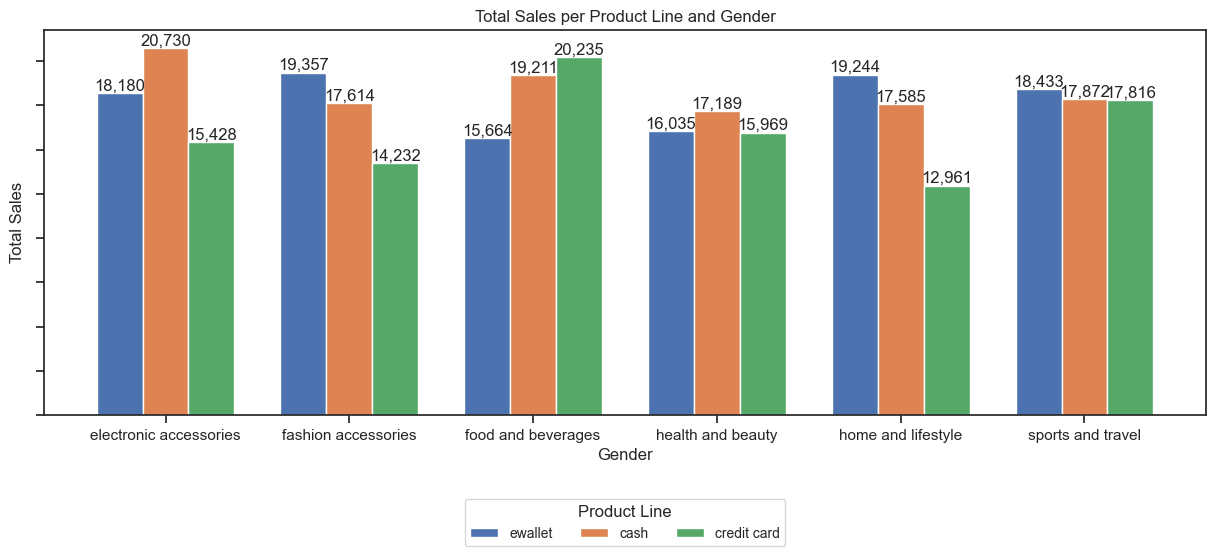

In [169]:
# Menghitung total penjualan per kota dan garis produk
total_sales_per_payment_product = supermarkets.groupby(['product_line', 'payment'])['total'].sum().unstack().reset_index()

# Membuat grup barplot
bar_width = 0.2
group_width = bar_width * len(supermarkets['payment'].unique())
index = np.arange(len(total_sales_per_payment_product['product_line'])) * (group_width + 0.2)

# Pengaturan ukuran figsize
fig, ax = plt.subplots(figsize=(15, 5))

for i, payment in enumerate(supermarkets['payment'].unique()):
    bars = ax.bar(index + i * bar_width, total_sales_per_payment_product[payment], bar_width, label=payment)
    
    # Menambahkan nilai di atas setiap bar dengan format
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 10, '{:,.0f}'.format(yval), ha='center', va='bottom')

# Pengaturan sumbu dan label
ax.set_xlabel('Gender')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales per Product Line and Gender')
ax.set_xticks(index + (group_width - bar_width) / 2)
ax.set_xticklabels(total_sales_per_payment_product['product_line'])

# Menempatkan legend di bawah grafik dengan orientasi horizontal
ax.legend(title='Product Line', bbox_to_anchor=(0.5, -0.2), loc='upper center', fontsize='small', ncol=len(supermarkets['payment'].unique()))

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: ''))

# Menampilkan plot
plt.show()

### Rating by Product Line and Customer Type

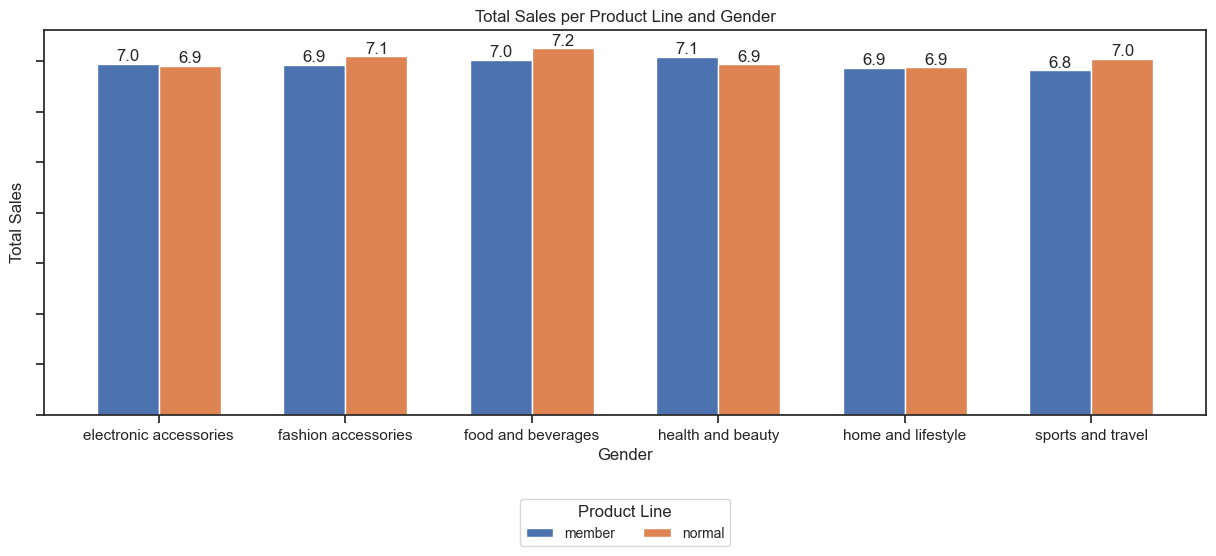

In [176]:
# Menghitung total penjualan per kota dan garis produk
rating_by_product_type = supermarkets.groupby(['product_line', 'customer_type'])['rating'].mean().unstack().reset_index()

# Membuat grup barplot
bar_width = 0.2
group_width = bar_width * len(supermarkets['customer_type'].unique())
index = np.arange(len(rating_by_product_type['product_line'])) * (group_width + 0.2)

# Pengaturan ukuran figsize
fig, ax = plt.subplots(figsize=(15, 5))

for i, customer_type in enumerate(supermarkets['customer_type'].unique()):
    bars = ax.bar(index + i * bar_width, rating_by_product_type[customer_type], bar_width, label=customer_type)
    
    # Menambahkan nilai di atas setiap bar dengan format
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0, '{:,.1f}'.format(yval), ha='center', va='bottom')

# Pengaturan sumbu dan label
ax.set_xlabel('Gender')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales per Product Line and Gender')
ax.set_xticks(index + (group_width - bar_width) / 2)
ax.set_xticklabels(rating_by_product_type['product_line'])

# Menempatkan legend di bawah grafik dengan orientasi horizontal
ax.legend(title='Product Line', bbox_to_anchor=(0.5, -0.2), loc='upper center', fontsize='small', ncol=len(supermarkets['customer_type'].unique()))

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: ''))

# Menampilkan plot
plt.show()

### Correlation

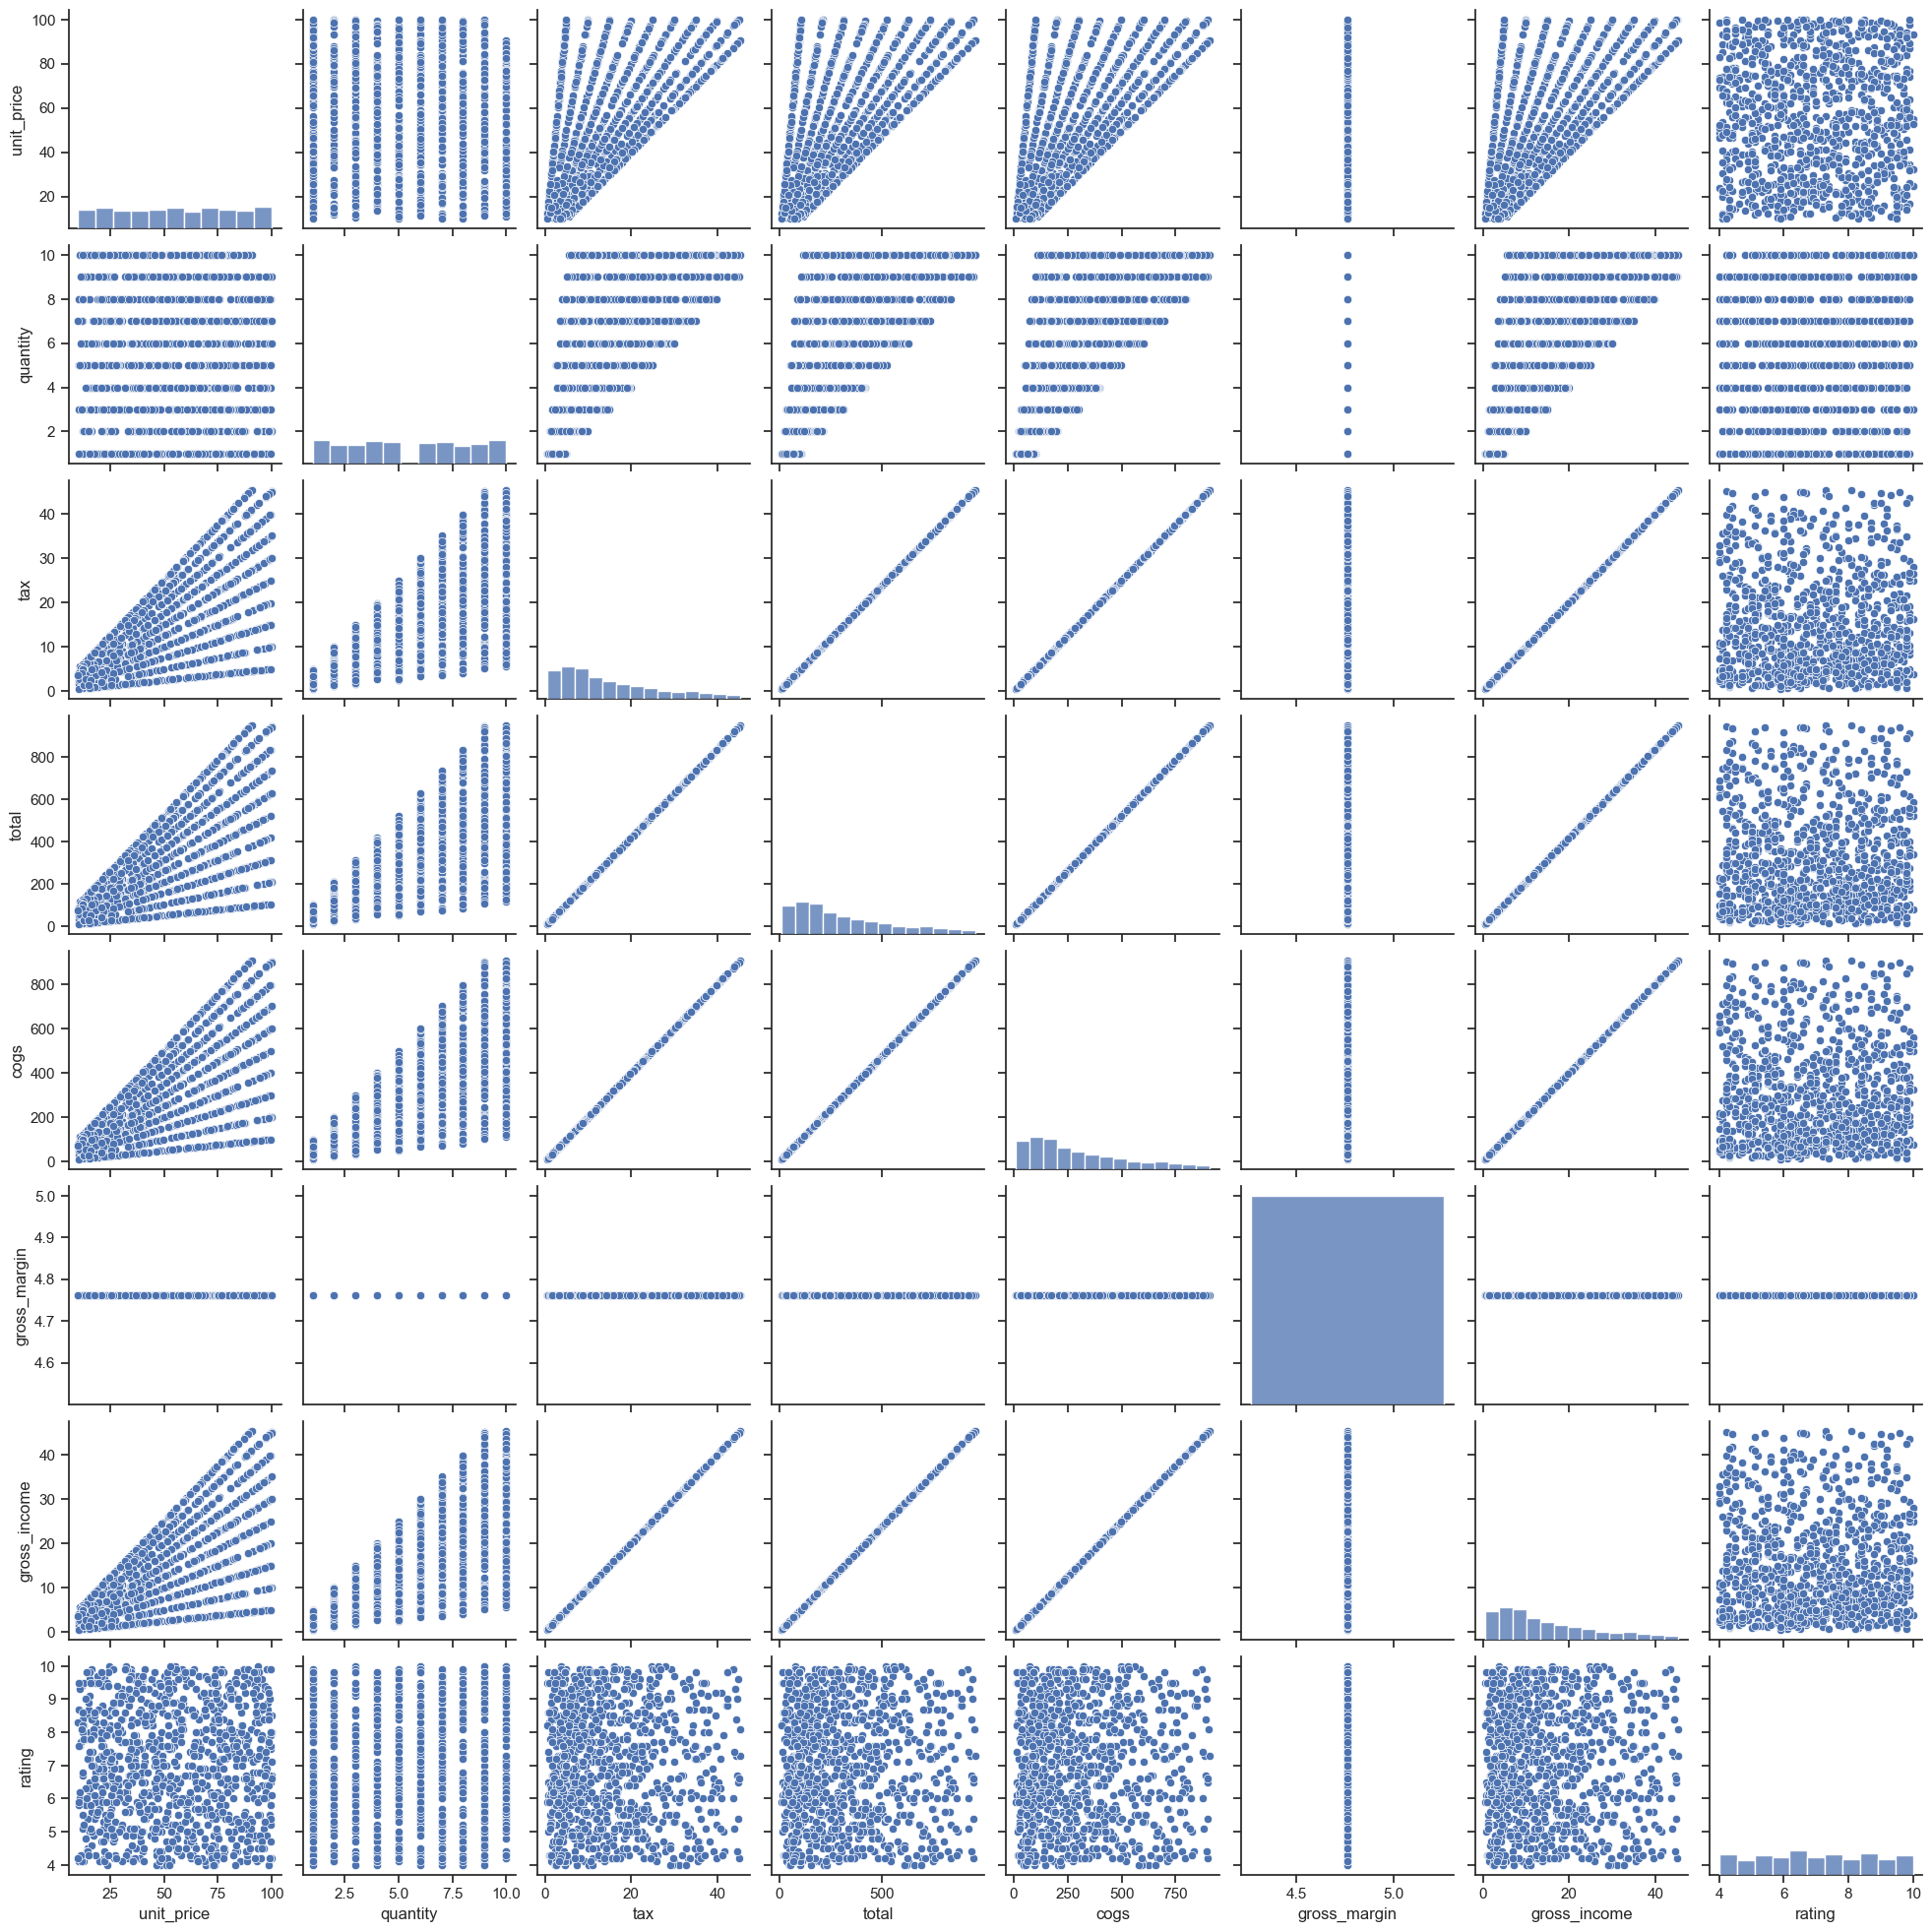

In [131]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(supermarkets)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18536\1655968532.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = supermarkets.corr()


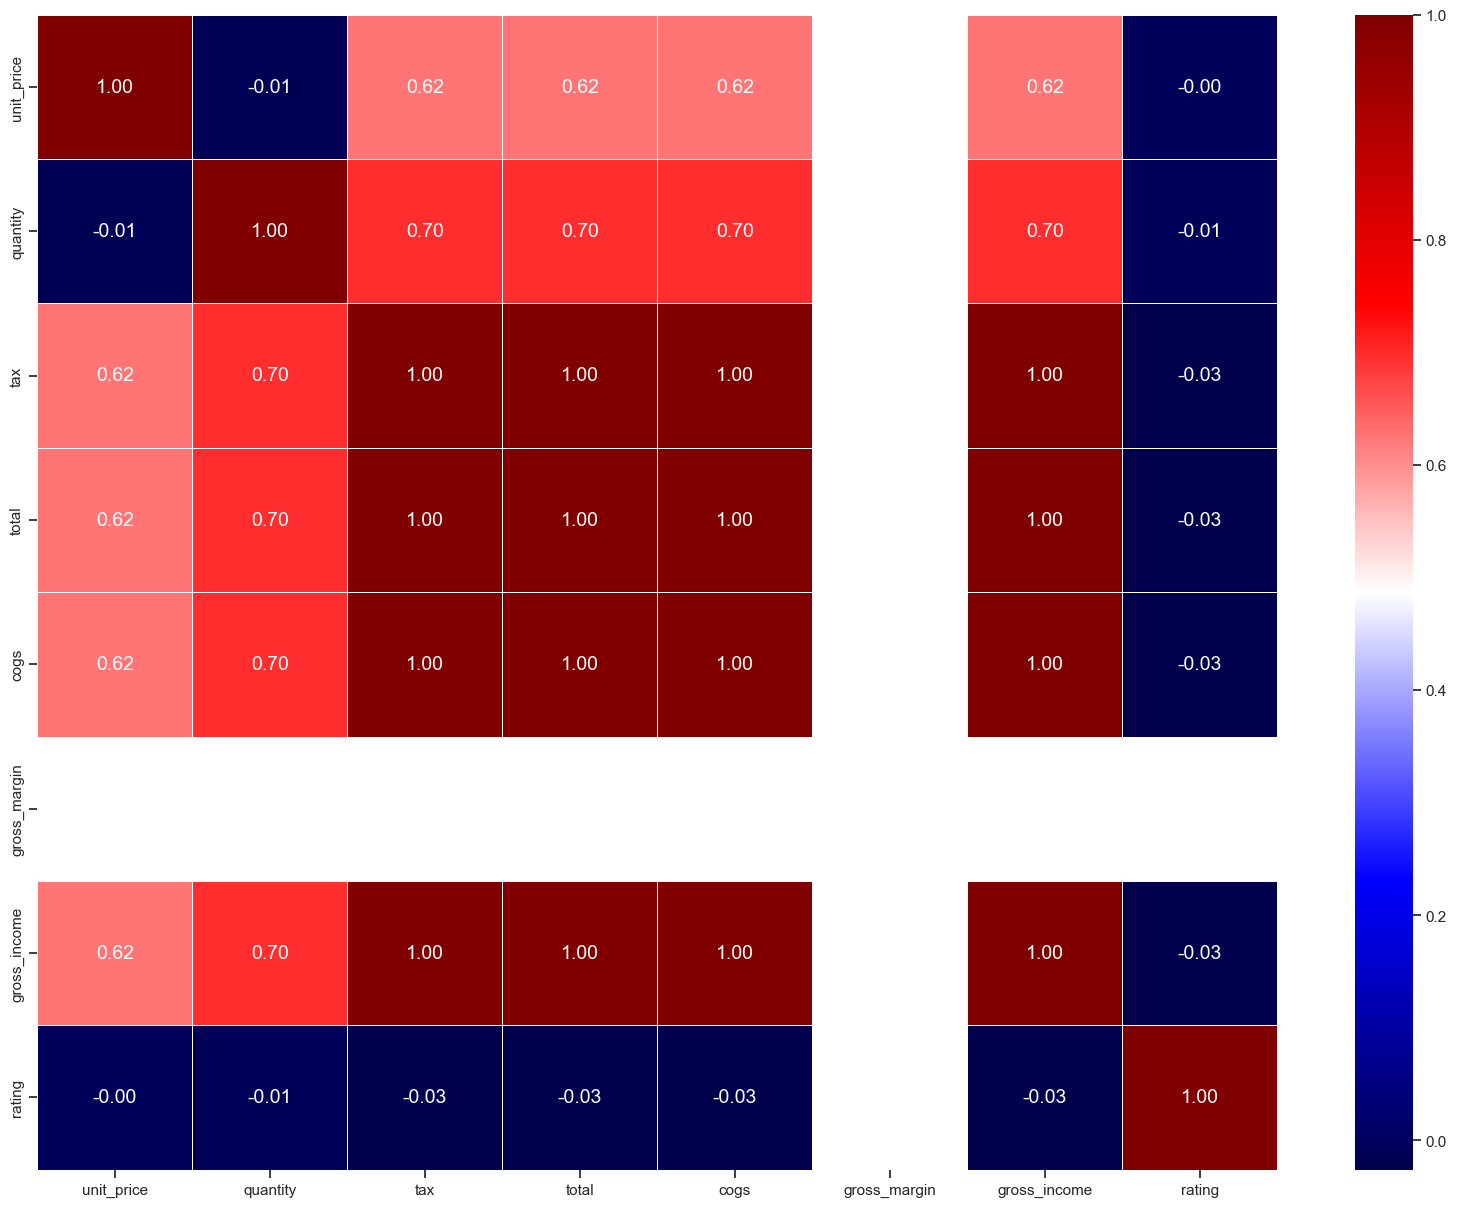

In [132]:
corr_matrix = supermarkets.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', linewidths=0.5, cmap="seismic", annot_kws={"fontsize": 14})

plt.show()

In [133]:
corr = supermarkets.corr()["total"].sort_values(ascending=False)
corr_table = pd.DataFrame(corr)
corr_table.columns = ["Correlation with total sales"]
corr_table

C:\Users\USER\AppData\Local\Temp\ipykernel_18536\1649493076.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = supermarkets.corr()["total"].sort_values(ascending=False)


,Correlation with total sales
gross_income,1.000000
tax,1.000000
cogs,1.000000
total,1.000000
quantity,0.699290
unit_price,0.623355
rating,-0.026092
gross_margin,NaN


In [134]:
corr = supermarkets.corr()["gross_income"].sort_values(ascending=False)
corr_table = pd.DataFrame(corr)
corr_table.columns = ["Correlation with gross income"]
corr_table

C:\Users\USER\AppData\Local\Temp\ipykernel_18536\3054175147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = supermarkets.corr()["gross_income"].sort_values(ascending=False)


,Correlation with gross income
cogs,1.000000
total,1.000000
tax,1.000000
gross_income,1.000000
quantity,0.699290
unit_price,0.623355
rating,-0.026092
gross_margin,NaN


### Hypothesis Test

Cek distribusi

In [137]:
columns_to_test = ['total', 'gross_income']

for column in columns_to_test:
    stat, p_value = st.shapiro(supermarkets[column])
    alpha = 0.05
    
    print(f"Column: {column}")
    print(f"Shapiro-Wilk test statistic: {stat}")
    print(f"p-value: {p_value}")

    if p_value < alpha:
        print("Hipotesis nol ditolak: distribusinya tidak normal.")
    else:
        print("Gagal menolak hipotesis nol: distribusinya terlihat normal")
    
    print("---------------------------------------------------")


Column: total
Shapiro-Wilk test statistic: 0.9110251069068909
p-value: 1.2673509559422393e-23
Hipotesis nol ditolak: distribusinya tidak normal.
---------------------------------------------------
Column: gross_income
Shapiro-Wilk test statistic: 0.9110251665115356
p-value: 1.2673874013160605e-23
Hipotesis nol ditolak: distribusinya tidak normal.
---------------------------------------------------


cek variance homogen

In [138]:
# Pisahkan data produk C dan produk lainnya
food = supermarkets[supermarkets['product_line'] == 'food and beverages']['total']
others = supermarkets[supermarkets['product_line'] != 'food and beverages']['total']

# Lakukan Levene's test
statistic, p_value = levene(food, others)

# Ambil keputusan berdasarkan nilai p
alpha = 0.05
if p_value < alpha:
    hasil_uji = "Varians tidak homogen (terdapat perbedaan signifikan dalam varians antara kelompok)."
else:
    hasil_uji = "Varians homogen (tidak terdapat perbedaan signifikan dalam varians antara kelompok)."

print(hasil_uji)

Varians homogen (tidak terdapat perbedaan signifikan dalam varians antara kelompok).


In [139]:
# Hipotesis
# Hipotesis nol (H0): Rata-rata total_sales dari semua kategori produk tidak berbeda.
# Hipotesis alternatif (H1): Rata-rata total_sales dari setidaknya satu kategori produk berbeda.

# Definisikan variabel untuk menyimpan data
product_food = supermarkets[supermarkets["product_line"] == "food and beverages"]["total"]
product_health = supermarkets[supermarkets["product_line"] == "health and beauty"]["total"]
product_electronic = supermarkets[supermarkets["product_line"] == "electronic accessories"]["total"]
product_lifestyle = supermarkets[supermarkets["product_line"] == "home and lifestyle"]["total"]
product_sport = supermarkets[supermarkets["product_line"] == "sports and travel"]["total"]
product_fashion = supermarkets[supermarkets["product_line"] == "fashion accessories"]["total"]

# Lakukan uji Kruskal-Wallis
kruskal_wallis, p_value = st.kruskal(product_food, product_health, product_electronic, product_lifestyle, product_sport, product_fashion)

print('Uji Kruskal-Wallis test:')
print(f"Statistik uji: {statistic}")
print(f"Nilai p: {p_value}")
print()

# Interpretasi hasil uji
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. Terdapat perbedaan signifikan antara rata-rata total_sales dari setidaknya satu kategori produk.")
else:
    print("There is not enough evidence to reject the null hypothesis. Tidak terdapat perbedaan signifikan antara rata-rata total_sales dari semua kategori produk.")


Uji Kruskal-Wallis test:
Statistik uji: 0.13556833616669767
Nilai p: 0.7827208639944573

There is not enough evidence to reject the null hypothesis. Tidak terdapat perbedaan signifikan antara rata-rata total_sales dari semua kategori produk.


In [140]:
# Hipotesis
# H0: Tidak terdapat perbedaan signifikan antara rata-rata total_sales product_food dan kategori produk lainnya
# H1: Terdapat perbedaan signifikan antara rata-rata total_sales product_food dan kategori produk lainnya

# Define list of other product categories
other_products = ['health and beauty', 'electronic accessories', 'home and lifestyle', 'sports and travel', 'fashion accessories']

# Set significance level
alpha = 0.05

# Loop through each other product category
for product in other_products:
    
    # Select data for comparison
    other_product_data = supermarkets[supermarkets['product_line'] == product]['total']
    
    # Downsample to ensure equal sample sizes
    min_sample_size = min(len(product_food), len(other_product_data))
    product_food = product_food.sample(n=min_sample_size, random_state=42)
    other_product_data = other_product_data.sample(n=min_sample_size, random_state=42)
    
    # Perform Wilcoxon signed-rank test
    statistic, p_value = st.wilcoxon(product_food, other_product_data)
    
    # Print results for each comparison
    print(f"Uji Wilcoxon signed-rank test untuk product_food vs. {product}:")
    print(f"Statistik uji: {statistic}")
    print(f"Nilai p: {p_value}")
    
    # Interpret results
    if p_value < alpha:
        print(f"H0 ditolak. Terdapat perbedaan signifikan antara rata-rata total_sales product_food dan {product}.")
    else:
        print(f"H0 tidak dapat ditolak. Tidak terdapat perbedaan signifikan antara rata-rata total_sales product_food dan {product}.")
    print("")



Uji Wilcoxon signed-rank test untuk product_food vs. health and beauty:
Statistik uji: 5630.0
Nilai p: 0.7350173496884608
H0 tidak dapat ditolak. Tidak terdapat perbedaan signifikan antara rata-rata total_sales product_food dan health and beauty.

Uji Wilcoxon signed-rank test untuk product_food vs. electronic accessories:
Statistik uji: 5719.0
Nilai p: 0.8612777812685236
H0 tidak dapat ditolak. Tidak terdapat perbedaan signifikan antara rata-rata total_sales product_food dan electronic accessories.

Uji Wilcoxon signed-rank test untuk product_food vs. home and lifestyle:
Statistik uji: 5534.0
Nilai p: 0.6065207065523843
H0 tidak dapat ditolak. Tidak terdapat perbedaan signifikan antara rata-rata total_sales product_food dan home and lifestyle.

Uji Wilcoxon signed-rank test untuk product_food vs. sports and travel:
Statistik uji: 5377.0
Nilai p: 0.42148936889105115
H0 tidak dapat ditolak. Tidak terdapat perbedaan signifikan antara rata-rata total_sales product_food dan sports and trav

In [177]:
# Hipotesis
# H0: Tidak terdapat perbedaan signifikan antara rata-rata total_sales member dan non member
# H1: Terdapat perbedaan signifikan antara rata-rata total_sales member dan non member

members = supermarkets[supermarkets['customer_type'] == 'member']
non_members = supermarkets[supermarkets['customer_type'] == 'normal']

min_sample_size = min(len(members), len(non_members))
members = members.sample(n=min_sample_size, random_state=42)
non_members = non_members.sample(n=min_sample_size, random_state=42)

alpha = 0.05

statistic, p_value = wilcoxon(members['total'], non_members['total'])

print('Uji Wilcoxon signed-rank test:')
print(f"Statistik uji: {statistic}")
print(f"Nilai p: {p_value}")
print()
if p_value < alpha:
    print("H0 ditolak. Terdapat perbedaan signifikan antara rata-rata total_sales member dan non member.")
else:
    print("H0 tidak dapat ditolak. Tidak terdapat perbedaan signifikan antara rata-rata total_sales member dan non member.")

Uji Wilcoxon signed-rank test:
Statistik uji: 57699.0
Nilai p: 0.3139965459334958

H0 tidak dapat ditolak. Tidak terdapat perbedaan signifikan antara rata-rata total_sales member dan non member.


## Step 3 : Summary

### Total Sales by Product

Ada 2 variabel yang mempunyai korelasi positif dengan total sales yaitu unit price (0.62) dan quantity (0.70) sehingga urutan produk dengan total sales paling besar yaitu :
1. Produk Food and Beverages sebesar $55,110
2. Produk Electronic Accessories sebesar $54,338
3. Produk Sports and Travel sebesar $54,121
4. Produk Fashion Accessories sebesar $51,203
5. Produk Home and Lifestyle sebesar $49,790
6. Produk Health and Beauty sebesar $49,194

Produk Food and Beverages menjadi produk dengan total sales paling besar ($55,110) dimana unit price-nya ($55.8) hanya menempati urutan ketiga tertinggi setelah produk Sport and Travel ($56.8), dan Produk Fashion Accessories ($56.4). Namun dari segi quantity produk Food and Beverages memiliki quantity kedua tertinggi (942) setelah produk Electronic Accessories (971).

Adapun produk Electronic Accessories yang memiliki unit price terendah ($53.6) namun memiliki quantity paling tinggi (971) sehingga memiliki total sales tertinggi kedua sebesar $54,338 setelah produk Food and Beverages sebesar $55,110

### Total Product with Good Returns

Keuntungan terbesar berbanding lurus dengan total sales, semakin tinggi total sales sebuah produk maka keuntungan semakin besar pula. Berikut detail keuntungan per produk :
1. Produk Food and Beverages sebesar $2,624
2. Produk Electronic Accessories sebesar $2,588
3. Produk Sports and Travel sebesar $2,577
4. Produk Fashion Accessories sebesar $2,438
5. Produk Home and Lifestyle sebesar $2,371
6. Produk Health and Beauty sebesar $2,343

Untuk keuntungan produk per quantity dipengaruhi oleh unit price sehingga produk dengan keuntungan per quantity terbesar yaitu pada produk Sports and Travel sebesar $2.83 dan yang terendah adalah produk Electronic Accessories sebesar $2.66.

### Total Product with Lowest Production Cost

Product dengan lowest production cost adalah produk dengan total sales terkecil yaitu produk Health and Beauty $46,851 dimana total sales nya yaitu $49,194 dan keuntungan terkecil sebesar $2,343. Semakin besar total sales-nya maka semakin besar COGS-nya, hal ini terjadi karena COGS merupakan variable cost. Ratio COGS untuk produk ini adalah 95.2% dari total sales dan hanya memiliki keuntungan gross sebesar 4.8% dari total sales. 

Setelah dianalisa dengan produk lainnya, maka diketahui bahwa keuntungan gross untuk setiap produk sama yaitu 4.8% dari total sales dan besar COGS-nya juga sama yaitu 95.2% dari total sales. 

### Difference Total Sales by Product dan Customer Type

Pada proses pengujian statistik terhadap variabel total sales diketahui bahwa distribusi data tidak normal dan variance-nya homogen. Maka untuk pengujian digunakan 2 metode yang berbeda yaitu :


1. Uji Kruskal-Wallis, dimana uji ini merupakan uji non-parametrik dengan jumlah kelompok data lebih dari 3 (terdapat 6 produk dalam case ini yaitu : Food and Beverages, Electronic Accessories, Sports and Travel, Fashion Accessories, Home and Lifestyle, Health and Beauty) dengan hasil tes menyatakan Tidak terdapat perbedaan signifikan antara rata-rata total_sales dari semua kategori produk.

2. Uji Wilcoxon, merupakan uji non-parametrik dengan jumlah kelompok data sebanyak 2. Produk dengan total sales tertinggi yaitu Food and Beverages dibandingkan dengan produk lain dan menghasilkan : Tidak terdapat perbedaan signifikan antara rata-rata total_sales product_food dengan produk lainnya.

3. Uji wilcoxon, dimana uji ini kami membandingkan antara rata-rata total sales member dan non member dengan hasil : Tidak terdapat perbedaan signifikan antara rata-rata total_sales member dan non member.


## Step 4 : Recommendation

Untuk meningkatkan penjualan untuk produk paling laris yaitu produk food and beverages maka kami merekomendasikan untuk meningkatkan quantity penjualan yang punya korelasi cukup kuat dengan total sales dengan beberapa metode :

1. Fokus pemasaran di kota Naypyitaw, penjualan produk food and beverages di kota ini merupakan pembelian yang terbesar dibandingkan kota lainnya. Sehingga dengan melakukan fokus pemasaran pada kota ini diharapkan mampu meningkatkan total sales.

2. Program keanggotaan dan diskon, berdasarkan analisa data pembelian produk food and beverages diketahui bahwa pelanggan member lebih banyak melakukan pembelian. Namun jika diuji melalui metode statistik, total sales dari member dan non member tidak ada perbedaan yang signifikan. Program diskon eksklusif, penawaran spesial, atau hadiah kepada anggota yang sering berbelanja dapat meningkatkan loyalitas pelanggan.

3. Analisa demograsi pembeli, pada produk ini gender female lebih dominan melakukan transaksi. Hal ini dapat menjadi data pendukung untuk pembuatan strategi pemasaran khusus untuk gender tertentu seperti tambahan diskon dan spesial program.

4. Diversifikasi metode pembayaran, untuk mempermudah transaksi pembayaran kita dapat memberikan benefit tertentu untuk metode pembayaran terbanyak yaitu credit card. Atau kita juga dapa fokus ke kemudahan pembayaran menggunakan E-Wallet.

5. Berdasarkan rating, produk food and beverages memiliki rating paling tinggi dibandingkan produk lainnya. Namun, rating pelanggan non member yaitu 7.2 sedangkan rating member hanya 7.0 . Hal ini menandakan bahwa kita perlu fokus untuk merawat pelanggan member dengan peningkatan kualitas pelayanan atau benefit lebih, sehingga pelanggan lebih tertarik dan lebih puas dengan status member. Hal ini diyakini mampu meningkatkan sales dengan memperhatikan dominasi pembelian member dari pada non member.  